<a href="https://colab.research.google.com/github/kcarroth-dev/KarltonCarrothers_ML/blob/main/ECGR4105_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torchvision
import torchvision.transforms as transforms
import time

In [4]:
# Import csv data from my GitHub repo
energy_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/dataset.csv'

In [5]:
# Create dataframe from the URL
dfe = pd.read_csv(energy_url)

#Check to see Pandas dataframes are working
dfe.head()

,Year,Month,Sector,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
0,1973,1,Commerical,0.00,0.00,0.0,0.0,0.570,0.000,0.0,0.0,0.570,0.570,0.0,0.0,0.000,0.0
1,1973,1,Electric Power,0.00,0.49,0.0,0.0,0.054,0.157,0.0,0.0,0.211,89.223,0.0,0.0,88.522,0.0
2,1973,1,Industrial,1.04,0.00,0.0,0.0,98.933,0.000,0.0,0.0,98.933,99.973,0.0,0.0,0.000,0.0
3,1973,1,Residential,0.00,0.00,0.0,0.0,30.074,0.000,0.0,0.0,0.000,30.074,0.0,0.0,0.000,0.0
4,1973,1,Transportation,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.000,0.0,0.0,0.000,0.0


In [6]:
#Descibe datapoint to
dfe.describe()

,Year,Month,Hydroelectric Power,Geothermal Energy,Solar Energy,Wind Energy,Wood Energy,Waste Energy,"Fuel Ethanol, Excluding Denaturant",Biomass Losses and Co-products,Biomass Energy,Total Renewable Energy,Renewable Diesel Fuel,Other Biofuels,Conventional Hydroelectric Power,Biodiesel
count,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000,3065.000000
mean,1998.042414,6.491028,0.169759,1.146369,2.015008,4.282404,36.644408,5.820124,6.976648,4.834706,46.285969,70.872209,0.428949,0.031752,15.757374,0.953720
std,14.747378,3.456934,0.373819,1.550857,5.774511,18.124793,46.900639,8.247359,21.911920,15.601717,64.241520,71.197761,2.687850,0.258149,32.134059,3.985003
min,1973.000000,1.000000,-0.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1985.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.483000,0.000000,0.000000,0.000000,0.258000,2.070000,0.000000,0.000000,0.000000,0.000000
50%,1998.000000,6.000000,0.000000,0.357000,0.004000,0.000000,12.062000,0.108000,0.007000,0.000000,9.716000,50.984000,0.000000,0.000000,0.000000,0.000000
75%,2011.000000,9.000000,0.036000,1.673000,0.774000,0.001000,51.808000,12.764000,1.283000,0.000000,89.359000,126.982000,0.000000,0.000000,0.000000,0.000000
max,2024.000000,12.000000,2.047000,5.951000,64.040000,157.409000,183.628000,32.875000,104.420000,75.373000,233.200000,308.175000,38.344000,4.101000,117.453000,27.871000


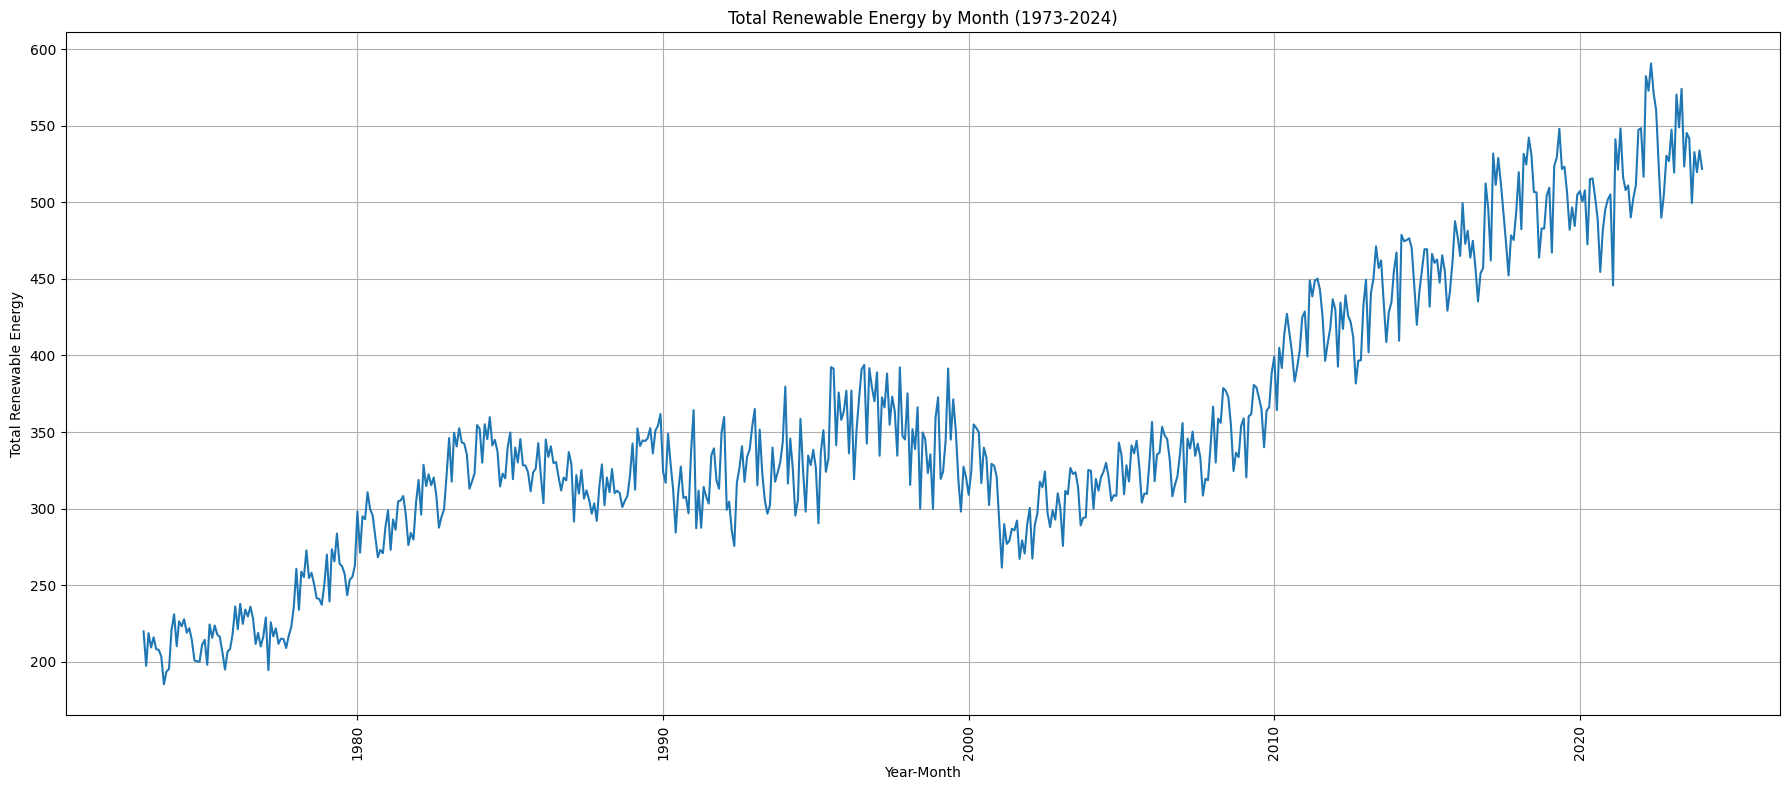

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Year and Month and sum 'Total Renewable Energy'
monthly_energy = dfe.groupby(['Year', 'Month'])['Total Renewable Energy'].sum().reset_index()

# Create a combined 'Year-Month' column for better plotting
monthly_energy['Year_Month'] = monthly_energy['Year'].astype(str) + '-' + monthly_energy['Month'].astype(str).str.zfill(2)

# Convert 'Year_Month' to datetime objects for proper sorting on the x-axis
monthly_energy['Year_Month'] = pd.to_datetime(monthly_energy['Year_Month'], format='%Y-%m')

# Sort the data by 'Year_Month'
monthly_energy = monthly_energy.sort_values(by='Year_Month')

plt.figure(figsize=(18, 8))
sns.lineplot(x='Year_Month', y='Total Renewable Energy', data=monthly_energy)
plt.title('Total Renewable Energy by Month (1973-2024)')
plt.xlabel('Year-Month')
plt.ylabel('Total Renewable Energy')
plt.grid(True)
plt.xticks(rotation=90) # Rotate x-axis labels for readability
plt.tight_layout()
plt.show()

In [8]:
all_columns = dfe.columns.tolist()

# Select columns from index 3 to 16
selected_by_index = all_columns[3:17]

# The column at index 12 in the original dfe DataFrame is 'Total Renewable Energy'.
# In the 'selected_by_index' list, 'Total Renewable Energy' will be at index 9 (12 - 3).
# So, we need to remove the element at index 9 from 'selected_by_index'.
# It's safer to remove by name to avoid off-by-one errors with list indexing after slicing.
column_to_exclude = all_columns[12] # This is 'Total Renewable Energy'

yearly_energy_columns = [col for col in selected_by_index if col != column_to_exclude]

print("Identified yearly energy columns:")
print(yearly_energy_columns)


Identified yearly energy columns:
['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Biomass Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']


In [9]:
yearly_energy_sums = dfe.groupby('Year')[yearly_energy_columns].sum().reset_index()

print("Yearly energy sums DataFrame head:")
print(yearly_energy_sums.head())

Yearly energy sums DataFrame head:
   Year  Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0  1973               11.420              6.709           0.0          0.0   
1  1974               10.850              8.368           0.0          0.0   
2  1975               10.597             11.077           0.0          0.0   
3  1976               10.977             12.340           0.0          0.0   
4  1977               10.658             12.223           0.0          0.0   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0     1527.016         2.055                                 0.0   
1     1537.761         1.902                                 0.0   
2     1496.929         1.806                                 0.0   
3     1711.487         1.889                                 0.0   
4     1836.521         1.808                                 0.0   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0          

In [10]:
yearly_energy_sums_melted = yearly_energy_sums.melt(id_vars=['Year'], var_name='Energy Source', value_name='Energy Value')

print("Melted DataFrame head:")
print(yearly_energy_sums_melted.head())

Melted DataFrame head:
   Year        Energy Source  Energy Value
0  1973  Hydroelectric Power        11.420
1  1974  Hydroelectric Power        10.850
2  1975  Hydroelectric Power        10.597
3  1976  Hydroelectric Power        10.977
4  1977  Hydroelectric Power        10.658


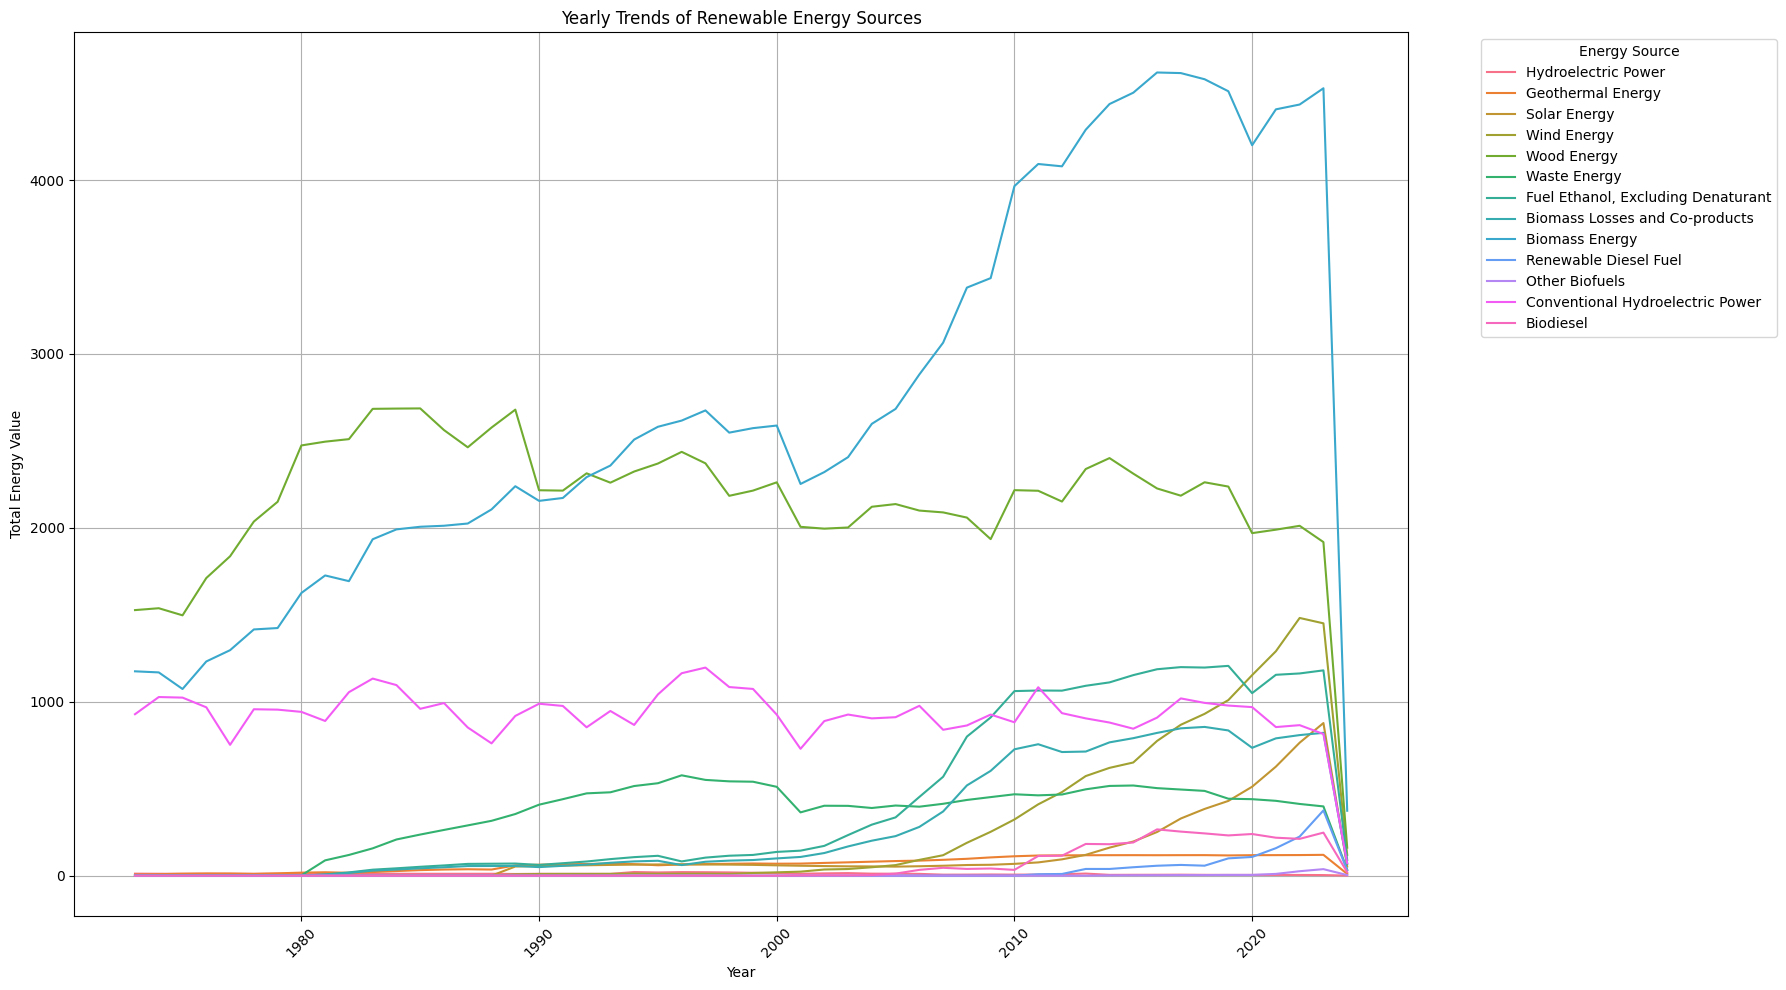

In [11]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=yearly_energy_sums_melted, x='Year', y='Energy Value', hue='Energy Source')
plt.title('Yearly Trends of Renewable Energy Sources')
plt.xlabel('Year')
plt.ylabel('Total Energy Value')
plt.grid(True)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [12]:
df_filtered_years = dfe[(dfe['Year'] >= 1973) & (dfe['Year'] <= 2022)]


In [13]:
yearly_energy_sums_filtered = df_filtered_years.groupby('Year')[yearly_energy_columns].sum().reset_index()

print("Yearly energy sums for 1973-2022 DataFrame head:")
print(yearly_energy_sums_filtered.head())
print("\nYearly energy sums for 1973-2022 DataFrame tail:")
print(yearly_energy_sums_filtered.tail())

Yearly energy sums for 1973-2022 DataFrame head:
   Year  Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0  1973               11.420              6.709           0.0          0.0   
1  1974               10.850              8.368           0.0          0.0   
2  1975               10.597             11.077           0.0          0.0   
3  1976               10.977             12.340           0.0          0.0   
4  1977               10.658             12.223           0.0          0.0   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0     1527.016         2.055                                 0.0   
1     1537.761         1.902                                 0.0   
2     1496.929         1.806                                 0.0   
3     1711.487         1.889                                 0.0   
4     1836.521         1.808                                 0.0   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel 

In [14]:
yearly_energy_sums_filtered_melted = yearly_energy_sums_filtered.melt(id_vars=['Year'], var_name='Energy Source', value_name='Energy Value')

print("Melted DataFrame head for 1973-2022:")
print(yearly_energy_sums_filtered_melted.head())

Melted DataFrame head for 1973-2022:
   Year        Energy Source  Energy Value
0  1973  Hydroelectric Power        11.420
1  1974  Hydroelectric Power        10.850
2  1975  Hydroelectric Power        10.597
3  1976  Hydroelectric Power        10.977
4  1977  Hydroelectric Power        10.658


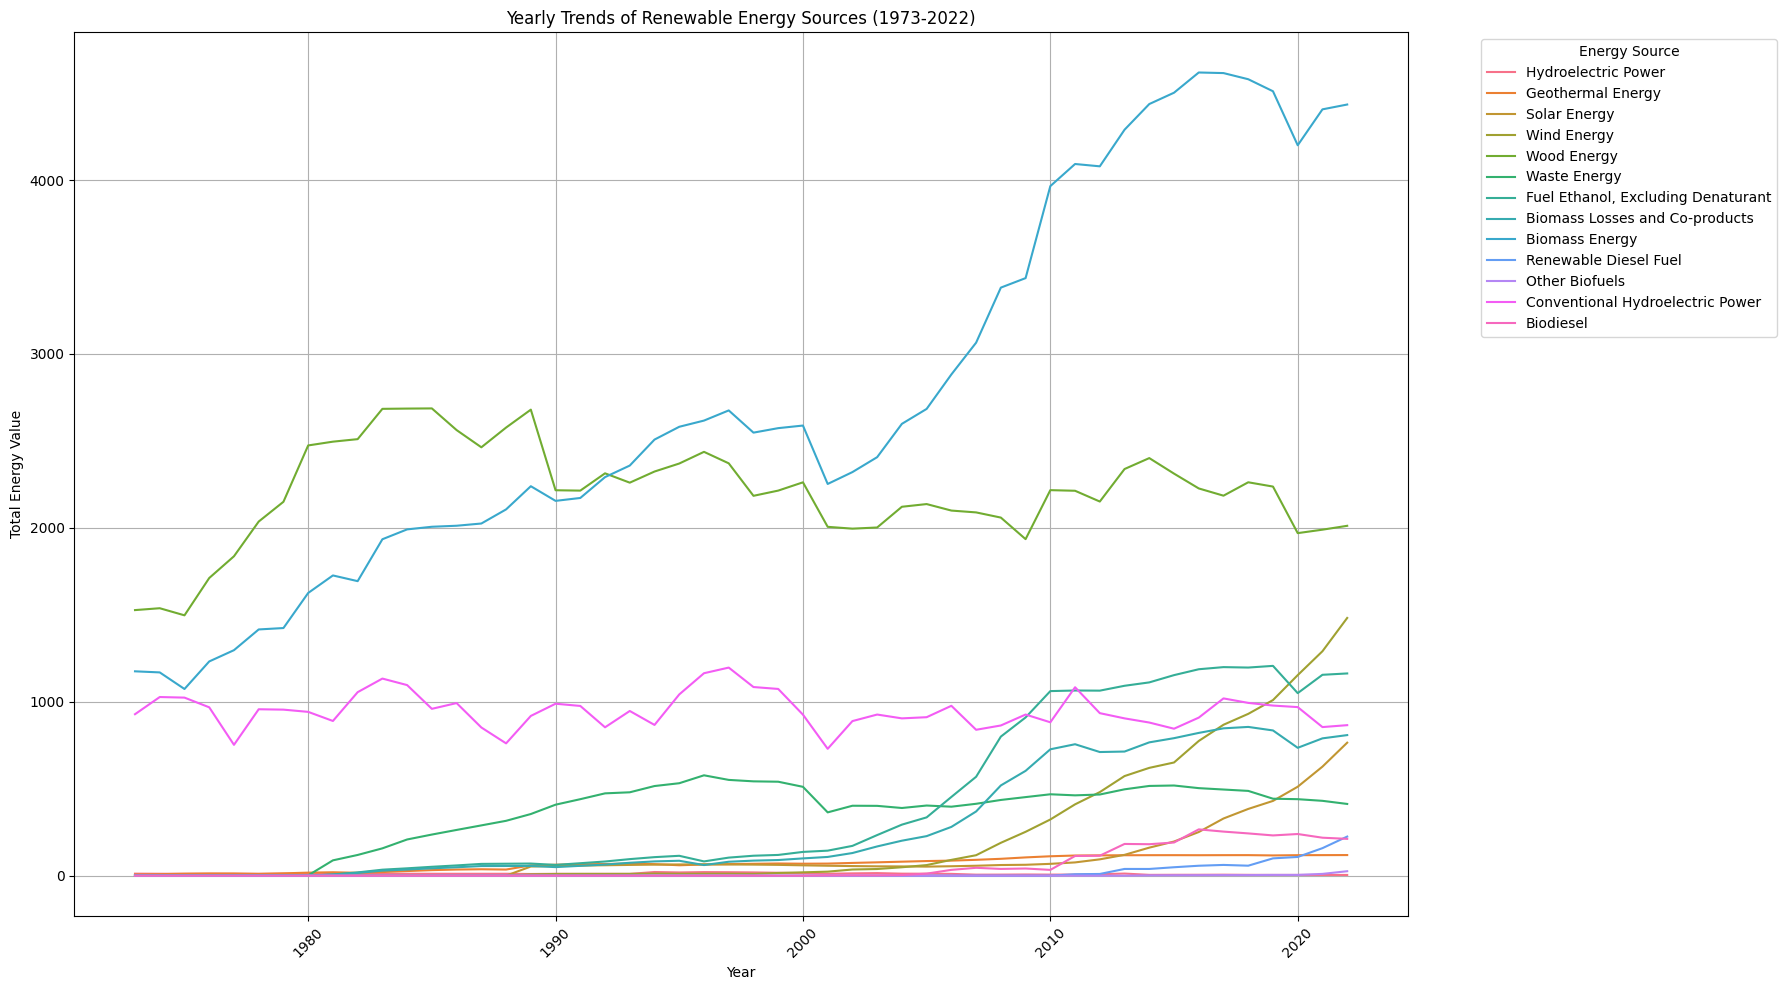

In [15]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=yearly_energy_sums_filtered_melted, x='Year', y='Energy Value', hue='Energy Source')
plt.title('Yearly Trends of Renewable Energy Sources (1973-2022)')
plt.xlabel('Year')
plt.ylabel('Total Energy Value')
plt.grid(True)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [16]:
print("Identified numerical energy source columns for correlation:")
print(yearly_energy_columns)

Identified numerical energy source columns for correlation:
['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Biomass Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']


In [17]:
yearly_energy_sums_for_corr = dfe.groupby('Year')[yearly_energy_columns].sum().reset_index()

print("Yearly aggregated sums for correlation head:")
print(yearly_energy_sums_for_corr.head())

Yearly aggregated sums for correlation head:
   Year  Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0  1973               11.420              6.709           0.0          0.0   
1  1974               10.850              8.368           0.0          0.0   
2  1975               10.597             11.077           0.0          0.0   
3  1976               10.977             12.340           0.0          0.0   
4  1977               10.658             12.223           0.0          0.0   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0     1527.016         2.055                                 0.0   
1     1537.761         1.902                                 0.0   
2     1496.929         1.806                                 0.0   
3     1711.487         1.889                                 0.0   
4     1836.521         1.808                                 0.0   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0

**Reasoning**:
With the yearly aggregated sums calculated, the next logical step is to compute the correlation matrix among these energy sources and then visualize it using a heatmap, which is a key part of the main task.



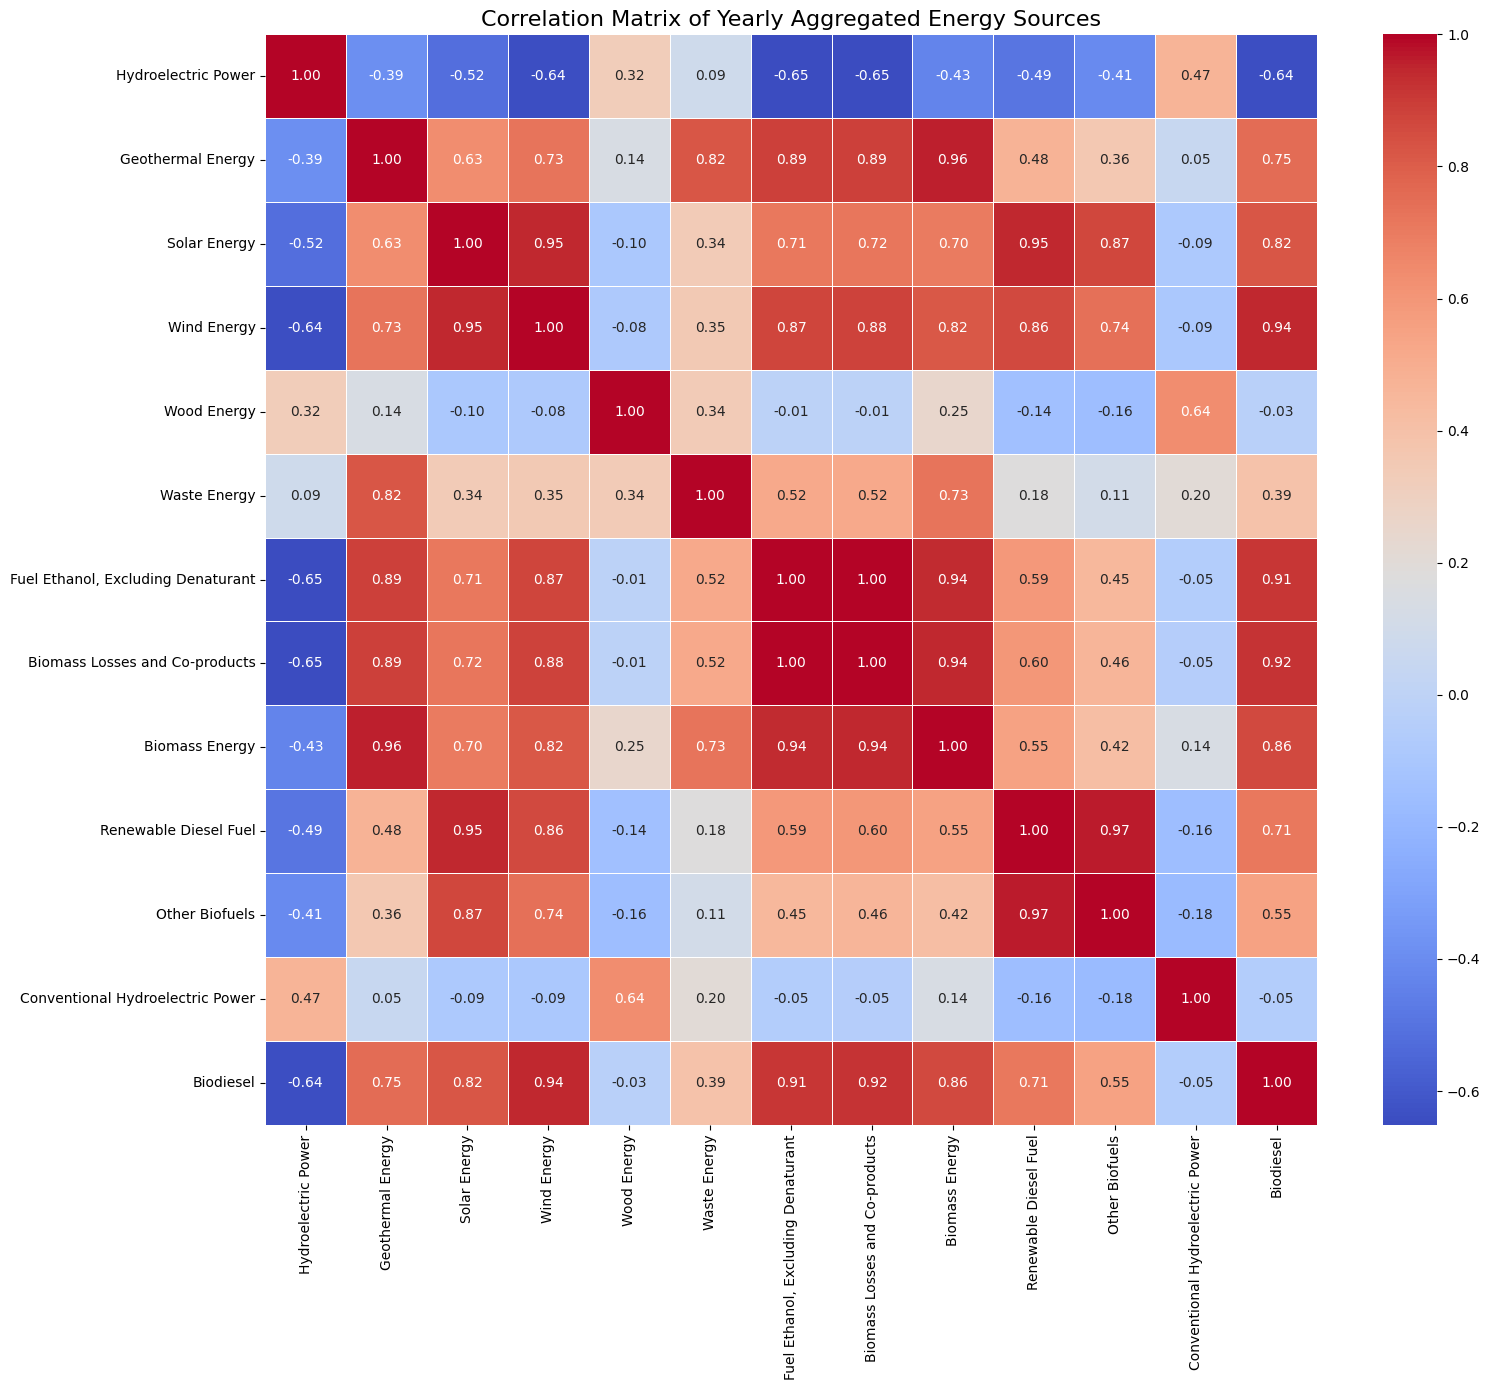

In [18]:
correlation_matrix = yearly_energy_sums_for_corr[yearly_energy_columns].corr()

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Yearly Aggregated Energy Sources', fontsize=16)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [19]:
from sklearn.preprocessing import StandardScaler

# 1. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_for_corr['Year'].values.reshape(-1, 1)

# 2. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_for_corr[yearly_energy_columns].values

# 3. Create and fit StandardScaler for X, then transform X
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

# 4. Create and fit StandardScaler for Y, then transform Y
y_scaler = StandardScaler()
Y_scaled = y_scaler.fit_transform(Y)

print("Shape of X_scaled:", X_scaled.shape)
print("Shape of Y_scaled:", Y_scaled.shape)
print("First 5 rows of X_scaled:\n", X_scaled[:5])
print("First 5 rows of Y_scaled:\n", Y_scaled[:5])

Shape of X_scaled: (52, 1)
Shape of Y_scaled: (52, 13)
First 5 rows of X_scaled:
 [[-1.69905634]
 [-1.63242668]
 [-1.56579702]
 [-1.49916736]
 [-1.4325377 ]]
First 5 rows of Y_scaled:
 [[ 0.31114623 -1.55090805 -0.61299311 -0.60655334 -1.60519677 -1.82780149
  -0.86651624 -0.8765697  -1.35077435 -0.38766576 -0.29820857 -0.00277057
  -0.61799768]
 [ 0.18572124 -1.50863186 -0.61299311 -0.60655334 -1.57794426 -1.8286216
  -0.86651624 -0.8765697  -1.356221   -0.38766576 -0.29820857  0.63515384
  -0.61799768]
 [ 0.13005014 -1.43959859 -0.61299311 -0.60655334 -1.68150633 -1.82913617
  -0.86651624 -0.8765697  -1.43917306 -0.38766576 -0.29820857  0.6134404
  -0.61799768]
 [ 0.2136668  -1.40741365 -0.61299311 -0.60655334 -1.1373236  -1.82869128
  -0.86651624 -0.8765697  -1.30140316 -0.38766576 -0.29820857  0.25339251
  -0.61799768]
 [ 0.14347282 -1.41039515 -0.61299311 -0.60655334 -0.82020028 -1.82912545
  -0.86651624 -0.8765697  -1.24504342 -0.38766576 -0.29820857 -1.14003311
  -0.61799768]]


In [20]:
class EnergyPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(EnergyPredictor, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(hidden_size, hidden_size)
        self.relu3 = nn.ReLU()
        self.fc4 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        x = self.relu3(x)
        x = self.fc4(x)
        return x

# Define model parameters
input_size = X_scaled.shape[1] # Number of features (1 for 'Year')
hidden_size = 64 # Can be adjusted
output_size = Y_scaled.shape[1] # Number of target energy sources

# Instantiate the model
model = EnergyPredictor(input_size, hidden_size, output_size)

print(f"Neural Network Model Architecture:\n{model}")

Neural Network Model Architecture:
EnergyPredictor(
  (fc1): Linear(in_features=1, out_features=64, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (relu3): ReLU()
  (fc4): Linear(in_features=64, out_features=13, bias=True)
)


In [21]:
# Convert numpy arrays to PyTorch tensors
X_train_tensor = torch.tensor(X_scaled, dtype=torch.float32)
Y_train_tensor = torch.tensor(Y_scaled, dtype=torch.float32)

# Create a TensorDataset and DataLoader
train_dataset = TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 1000 # Increased epochs for better training

print("Starting model training...")
for epoch in range(num_epochs):
    for X_batch, Y_batch in train_loader:
        # Forward pass
        outputs = model(X_batch)
        loss = criterion(outputs, Y_batch)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

print("Model training complete.")

Starting model training...
Epoch [100/1000], Loss: 0.0400
Epoch [200/1000], Loss: 0.0178
Epoch [300/1000], Loss: 0.0654
Epoch [400/1000], Loss: 0.0319
Epoch [500/1000], Loss: 0.0354
Epoch [600/1000], Loss: 0.0352
Epoch [700/1000], Loss: 0.0203
Epoch [800/1000], Loss: 0.0136
Epoch [900/1000], Loss: 0.0241
Epoch [1000/1000], Loss: 0.0396
Model training complete.


In [22]:
import numpy as np
import pandas as pd

# Generate future years from 2025 to 2100
future_years = np.arange(2025, 2101).reshape(-1, 1)

# Scale future years using the same x_scaler fitted on historical data
future_years_scaled = x_scaler.transform(future_years)

# Convert future scaled years to PyTorch tensor
future_years_tensor = torch.tensor(future_years_scaled, dtype=torch.float32)

# Make predictions with the trained model
model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for predictions
    predicted_scaled_values = model(future_years_tensor).numpy()

# Inverse transform the scaled predictions to get actual energy values
predicted_actual_values = y_scaler.inverse_transform(predicted_scaled_values)

# Create a DataFrame for the predicted future values
future_predictions_df = pd.DataFrame(predicted_actual_values, columns=yearly_energy_columns)
future_predictions_df['Year'] = future_years.flatten()

# Combine historical and predicted data
combined_df = pd.concat([yearly_energy_sums_for_corr, future_predictions_df], ignore_index=True)

print("Future Predictions DataFrame head:")
print(future_predictions_df.head())
print("\nCombined DataFrame head:")
print(combined_df.head())
print("\nCombined DataFrame tail:")
print(combined_df.tail())

Future Predictions DataFrame head:
   Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0             1.211614          41.608818    479.905090   653.313049   
1            -1.090072           9.180097    308.717834   263.519165   
2            -2.790160         -10.939456    183.162506     1.227166   
3            -4.250831         -30.462008     59.570938  -243.497589   
4            -4.990721         -41.075802      3.795758  -373.298584   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0   720.192993    101.798393                          398.247559   
1    41.810051    -41.797127                           19.005863   
2  -423.690186   -135.420776                         -219.480530   
3  -831.464111   -221.403717                         -447.081116   
4 -1057.390869   -272.972137                         -560.752075   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0                      280.986603     1618.3580

In [23]:
combined_df_melted = combined_df.melt(id_vars=['Year'], var_name='Energy Source', value_name='Energy Value')

print("Combined (Historical + Predicted) Melted DataFrame head:")
print(combined_df_melted.head())
print("\nCombined (Historical + Predicted) Melted DataFrame tail:")
print(combined_df_melted.tail())

Combined (Historical + Predicted) Melted DataFrame head:
   Year        Energy Source  Energy Value
0  1973  Hydroelectric Power        11.420
1  1974  Hydroelectric Power        10.850
2  1975  Hydroelectric Power        10.597
3  1976  Hydroelectric Power        10.977
4  1977  Hydroelectric Power        10.658

Combined (Historical + Predicted) Melted DataFrame tail:
      Year Energy Source  Energy Value
1659  2096     Biodiesel  -1169.440552
1660  2097     Biodiesel  -1184.320923
1661  2098     Biodiesel  -1199.201294
1662  2099     Biodiesel  -1214.081909
1663  2100     Biodiesel  -1228.962158


In [24]:
from sklearn.preprocessing import StandardScaler

# 1. Extract 'Year' column as X_lr and reshape to 2D array
X_lr = yearly_energy_sums_for_corr['Year'].values.reshape(-1, 1)

# 2. Extract yearly_energy_columns as Y_lr (keeping it unscaled)
Y_lr = yearly_energy_sums_for_corr[yearly_energy_columns].values

# 3. Instantiate a new StandardScaler for X_lr
x_scaler_lr = StandardScaler()

# 4. Fit x_scaler_lr to X_lr and then transform X_lr
X_lr = x_scaler_lr.fit_transform(X_lr)

print("Shape of X_lr (scaled year data):")
print(X_lr.shape)
print("First 5 rows of X_lr:\n", X_lr[:5])
print("\nShape of Y_lr (unscaled energy data):")
print(Y_lr.shape)
print("First 5 rows of Y_lr:\n", Y_lr[:5])

Shape of X_lr (scaled year data):
(52, 1)
First 5 rows of X_lr:
 [[-1.69905634]
 [-1.63242668]
 [-1.56579702]
 [-1.49916736]
 [-1.4325377 ]]

Shape of Y_lr (unscaled energy data):
(52, 13)
First 5 rows of Y_lr:
 [[1.142000e+01 6.709000e+00 0.000000e+00 0.000000e+00 1.527016e+03
  2.055000e+00 0.000000e+00 0.000000e+00 1.174972e+03 0.000000e+00
  0.000000e+00 9.283470e+02 0.000000e+00]
 [1.085000e+01 8.368000e+00 0.000000e+00 0.000000e+00 1.537761e+03
  1.902000e+00 0.000000e+00 0.000000e+00 1.168709e+03 0.000000e+00
  0.000000e+00 1.027120e+03 0.000000e+00]
 [1.059700e+01 1.107700e+01 0.000000e+00 0.000000e+00 1.496929e+03
  1.806000e+00 0.000000e+00 0.000000e+00 1.073324e+03 0.000000e+00
  0.000000e+00 1.023758e+03 0.000000e+00]
 [1.097700e+01 1.234000e+01 0.000000e+00 0.000000e+00 1.711487e+03
  1.889000e+00 0.000000e+00 0.000000e+00 1.231743e+03 0.000000e+00
  0.000000e+00 9.680100e+02 0.000000e+00]
 [1.065800e+01 1.222300e+01 0.000000e+00 0.000000e+00 1.836521e+03
  1.808000e+00 0.

In [25]:
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression model
linear_model = LinearRegression()

# Train the model )
linear_model.fit(X_lr, Y_lr)

print("Linear Regression model trained successfully.")

Linear Regression model trained successfully.


In [26]:
import numpy as np
import pandas as pd

# 1. Generate future years from 2025 to 2050
future_years_lr = np.arange(2025, 2051).reshape(-1, 1)

# 2. Scale future years using the same x_scaler_lr fitted on historical data
future_years_scaled_lr = x_scaler_lr.transform(future_years_lr)

# 3. Predict energy values for the scaled future years using the linear model
predicted_energy_lr = linear_model.predict(future_years_scaled_lr)

# 4. Create a DataFrame for the predicted future values
future_predictions_lr_df = pd.DataFrame(predicted_energy_lr, columns=yearly_energy_columns)

# 5. Add a 'Year' column to this new DataFrame
future_predictions_lr_df['Year'] = future_years_lr.flatten()

print("Future Predictions DataFrame head (Linear Regression):")
print(future_predictions_lr_df.head())
print("\nFuture Predictions DataFrame tail (Linear Regression):")
print(future_predictions_lr_df.tail())

Future Predictions DataFrame head (Linear Regression):
   Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0             5.746222         128.753217    353.274043   809.742244   
1             5.585476         131.062031    362.123281   830.773469   
2             5.424730         133.370845    370.972519   851.804694   
3             5.263985         135.679658    379.821758   872.835919   
4             5.103239         137.988472    388.670996   893.867143   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0  2034.020434    563.705731                         1119.244738   
1  2029.270036    572.032304                         1145.962662   
2  2024.519637    580.358877                         1172.680587   
3  2019.769238    588.685451                         1199.398512   
4  2015.018840    597.012024                         1226.116437   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0                      770.

In [27]:
combined_lr_df = pd.concat([yearly_energy_sums_for_corr, future_predictions_lr_df], ignore_index=True)

combined_lr_df_melted = combined_lr_df.melt(id_vars=['Year'], var_name='Energy Source', value_name='Energy Value')

print("Combined (Historical + Linear Regression Predicted) Melted DataFrame head:")
print(combined_lr_df_melted.head())
print("\nCombined (Historical + Linear Regression Predicted) Melted DataFrame tail:")
print(combined_lr_df_melted.tail())

Combined (Historical + Linear Regression Predicted) Melted DataFrame head:
   Year        Energy Source  Energy Value
0  1973  Hydroelectric Power        11.420
1  1974  Hydroelectric Power        10.850
2  1975  Hydroelectric Power        10.597
3  1976  Hydroelectric Power        10.977
4  1977  Hydroelectric Power        10.658

Combined (Historical + Linear Regression Predicted) Melted DataFrame tail:
      Year Energy Source  Energy Value
1009  2046     Biodiesel    274.789607
1010  2047     Biodiesel    279.391189
1011  2048     Biodiesel    283.992771
1012  2049     Biodiesel    288.594353
1013  2050     Biodiesel    293.195935


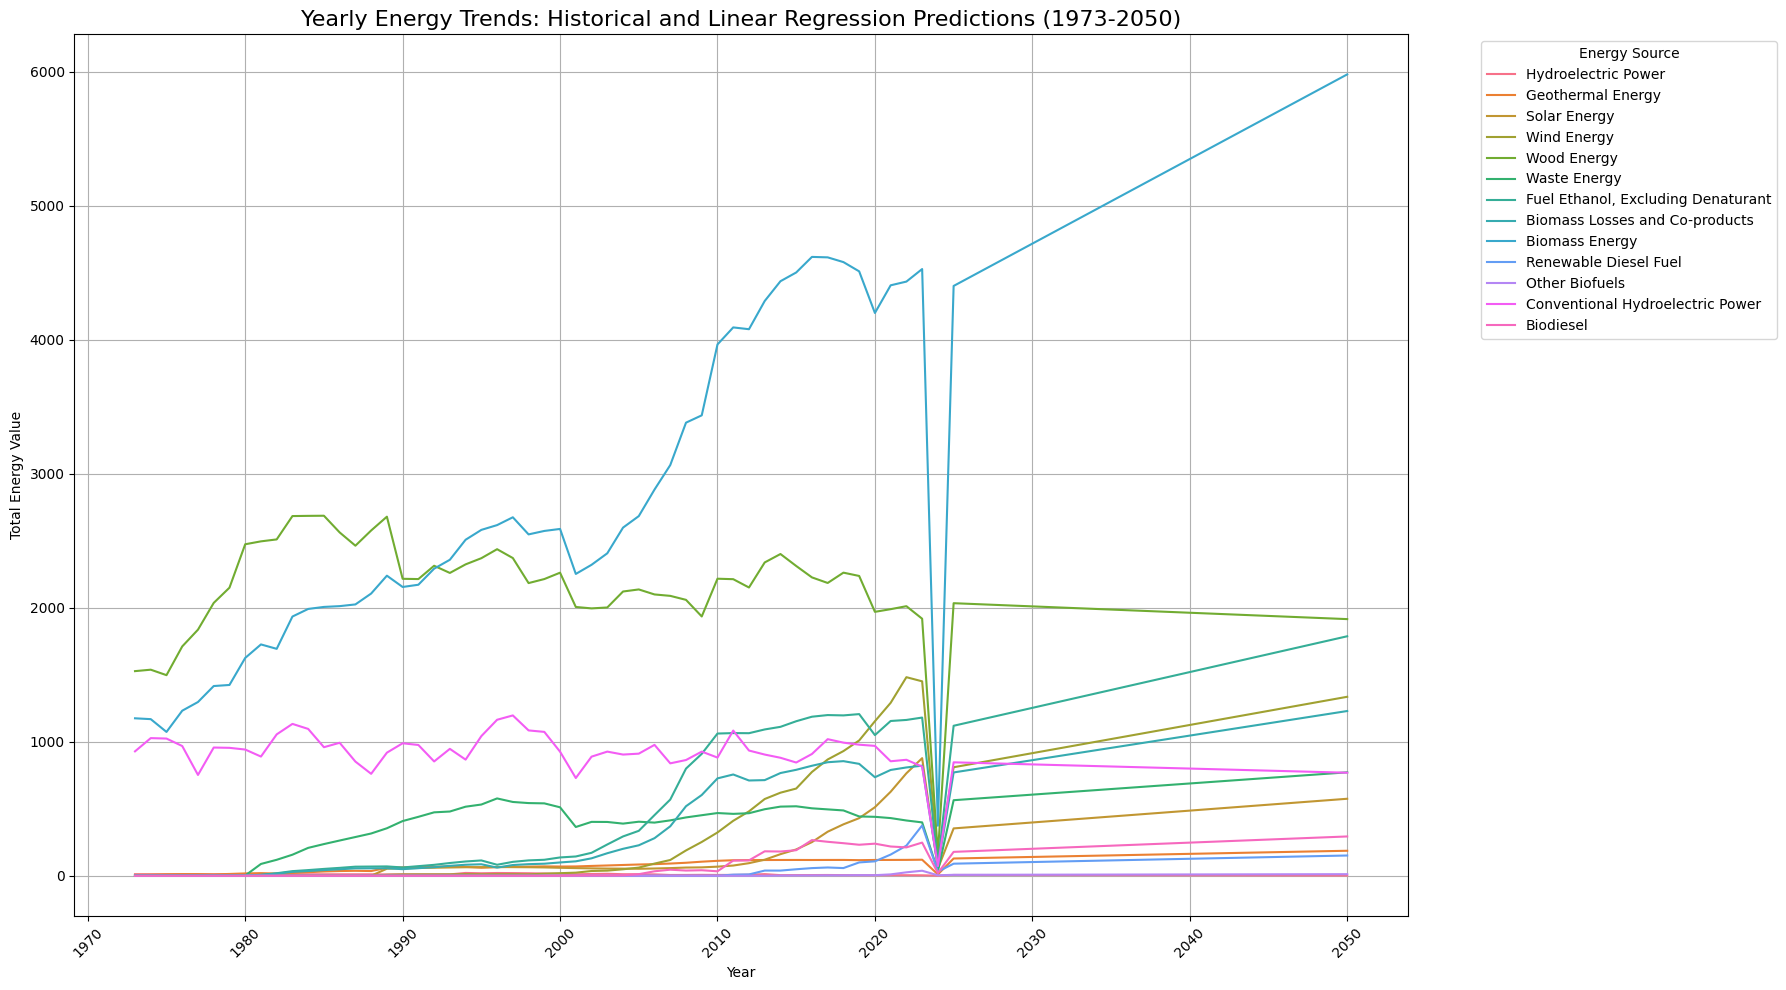

In [28]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=combined_lr_df_melted, x='Year', y='Energy Value', hue='Energy Source')
plt.title('Yearly Energy Trends: Historical and Linear Regression Predictions (1973-2050)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Energy Value')
plt.grid(True)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [29]:
from sklearn.preprocessing import StandardScaler

# 1. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_for_corr['Year'].values.reshape(-1, 1)

# 2. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_for_corr[yearly_energy_columns].values

# 3. Create and fit StandardScaler for X, then transform X
x_scaler = StandardScaler()
X_scaled = x_scaler.fit_transform(X)

# 4. Create and fit StandardScaler for Y, then transform Y
y_scaler = StandardScaler()
Y_scaled = y_scaler.fit_transform(Y)

# 5. Reshape X_scaled for CNN input format (batch_size, channels, sequence_length)
# For a 1D CNN, channels=1 and sequence_length=1 since 'Year' is a single feature
X_scaled_cnn = X_scaled.reshape(X_scaled.shape[0], 1, 1)

print("Shape of X_scaled_cnn (for CNN input):", X_scaled_cnn.shape)
print("Shape of Y_scaled:", Y_scaled.shape)
print("First 5 rows of X_scaled_cnn:\n", X_scaled_cnn[:5])
print("First 5 rows of Y_scaled:\n", Y_scaled[:5])

Shape of X_scaled_cnn (for CNN input): (52, 1, 1)
Shape of Y_scaled: (52, 13)
First 5 rows of X_scaled_cnn:
 [[[-1.69905634]]

 [[-1.63242668]]

 [[-1.56579702]]

 [[-1.49916736]]

 [[-1.4325377 ]]]
First 5 rows of Y_scaled:
 [[ 0.31114623 -1.55090805 -0.61299311 -0.60655334 -1.60519677 -1.82780149
  -0.86651624 -0.8765697  -1.35077435 -0.38766576 -0.29820857 -0.00277057
  -0.61799768]
 [ 0.18572124 -1.50863186 -0.61299311 -0.60655334 -1.57794426 -1.8286216
  -0.86651624 -0.8765697  -1.356221   -0.38766576 -0.29820857  0.63515384
  -0.61799768]
 [ 0.13005014 -1.43959859 -0.61299311 -0.60655334 -1.68150633 -1.82913617
  -0.86651624 -0.8765697  -1.43917306 -0.38766576 -0.29820857  0.6134404
  -0.61799768]
 [ 0.2136668  -1.40741365 -0.61299311 -0.60655334 -1.1373236  -1.82869128
  -0.86651624 -0.8765697  -1.30140316 -0.38766576 -0.29820857  0.25339251
  -0.61799768]
 [ 0.14347282 -1.41039515 -0.61299311 -0.60655334 -0.82020028 -1.82912545
  -0.86651624 -0.8765697  -1.24504342 -0.38766576 

In [30]:
class CNNPredictor(nn.Module):
    def __init__(self, input_channels, output_size):
        super(CNNPredictor, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv1d(32, 64, kernel_size=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv1d(64, 128, kernel_size=1)
        self.relu3 = nn.ReLU()
        # Define a fully connected layer to output the desired number of features
        self.fc = nn.Linear(128, output_size)

    def forward(self, x):
        # Pass through convolutional layers
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.conv3(x)
        x = self.relu3(x)
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1) # Flatten while preserving batch size
        # Pass through fully connected layer
        x = self.fc(x)
        return x

# Define model parameters
input_channels = X_scaled_cnn.shape[1] # Number of channels (1 for 'Year')
output_size = Y_scaled.shape[1] # Number of target energy sources

# Instantiate the model
cnn_model = CNNPredictor(input_channels, output_size)

print(f"CNN Model Architecture:\n{cnn_model}")

CNN Model Architecture:
CNNPredictor(
  (conv1): Conv1d(1, 32, kernel_size=(1,), stride=(1,))
  (relu1): ReLU()
  (conv2): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
  (relu2): ReLU()
  (conv3): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (relu3): ReLU()
  (fc): Linear(in_features=128, out_features=13, bias=True)
)


In [31]:
import torch.optim as optim

# Convert numpy arrays to PyTorch tensors
X_train_cnn_tensor = torch.tensor(X_scaled_cnn, dtype=torch.float32)
Y_train_cnn_tensor = torch.tensor(Y_scaled, dtype=torch.float32)

# Create a TensorDataset and DataLoader
train_cnn_dataset = TensorDataset(X_train_cnn_tensor, Y_train_cnn_tensor)
train_cnn_loader = DataLoader(train_cnn_dataset, batch_size=8, shuffle=True) # Using a small batch size for a small dataset

# Define loss function and optimizer
criterion_cnn = nn.MSELoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs_cnn = 1000 # Increased epochs for better training

print("Starting CNN model training...")
for epoch in range(num_epochs_cnn):
    for X_batch, Y_batch in train_cnn_loader:
        # Forward pass
        outputs = cnn_model(X_batch)
        loss = criterion_cnn(outputs, Y_batch)

        # Backward and optimize
        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_cnn}], Loss: {loss.item():.4f}')

print("CNN Model training complete.")

Starting CNN model training...
Epoch [100/1000], Loss: 0.0199
Epoch [200/1000], Loss: 0.0593
Epoch [300/1000], Loss: 0.0540
Epoch [400/1000], Loss: 0.6561
Epoch [500/1000], Loss: 0.0791
Epoch [600/1000], Loss: 0.1877
Epoch [700/1000], Loss: 0.1516
Epoch [800/1000], Loss: 0.0486
Epoch [900/1000], Loss: 0.0182
Epoch [1000/1000], Loss: 0.0494
CNN Model training complete.


In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import pandas as pd

# Make predictions on the historical data using the trained linear model
predicted_historical_values_lr = linear_model.predict(X_lr)

# Initialize dictionaries to store metrics for each energy source
mae_scores_lr = {}
mse_scores_lr = {}
r2_scores_lr = {}

# Calculate metrics for each energy source
for i, col_name in enumerate(yearly_energy_columns):
    mae = mean_absolute_error(Y_lr[:, i], predicted_historical_values_lr[:, i])
    mse = mean_squared_error(Y_lr[:, i], predicted_historical_values_lr[:, i])
    r2 = r2_score(Y_lr[:, i], predicted_historical_values_lr[:, i])

    mae_scores_lr[col_name] = mae
    mse_scores_lr[col_name] = mse
    r2_scores_lr[col_name] = r2

# Create a DataFrame for better visualization of results
metrics_df_lr = pd.DataFrame({
    'MAE': mae_scores_lr,
    'MSE': mse_scores_lr,
    'R-squared': r2_scores_lr
})

print("\nRegression Metrics for Linear Regression Model (Historical Data):")
print(metrics_df_lr)


Regression Metrics for Linear Regression Model (Historical Data):
                                           MAE            MSE  R-squared
Hydroelectric Power                   3.022719      14.832655   0.281813
Geothermal Energy                     9.181239     339.208197   0.779725
Solar Energy                         95.933992   19901.104734   0.469872
Wind Energy                         214.394552   73546.682253   0.575311
Wood Energy                         249.574431  150370.232001   0.032698
Waste Energy                        100.433590   19188.026828   0.448699
Fuel Ethanol, Excluding Denaturant  204.807585   64419.379669   0.713963
Biomass Losses and Co-products      139.312558   29947.128475   0.716643
Biomass Energy                      324.892185  423918.328756   0.679391
Renewable Diesel Fuel                33.172482    2910.299725   0.315793
Other Biofuels                        3.031834      31.226242   0.207218
Conventional Hydroelectric Power     88.084234   21800.48

In [49]:
import numpy as np
import pandas as pd

# Generate future years from 2025 to 2100
future_years = np.arange(2025, 2101).reshape(-1, 1)

# Scale future years using the same x_scaler fitted on historical data
future_years_scaled = x_scaler.transform(future_years)

# Reshape future scaled years for CNN input format
future_years_cnn_tensor = torch.tensor(future_years_scaled.reshape(future_years_scaled.shape[0], 1, 1), dtype=torch.float32)

# Make predictions with the trained CNN model
cnn_model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for predictions
    predicted_scaled_values_cnn = cnn_model(future_years_cnn_tensor).numpy()

# Inverse transform the scaled predictions to get actual energy values
predicted_actual_values_cnn = y_scaler.inverse_transform(predicted_scaled_values_cnn)

# Create a DataFrame for the predicted future values
future_predictions_cnn_df = pd.DataFrame(predicted_actual_values_cnn, columns=yearly_energy_columns)
future_predictions_cnn_df['Year'] = future_years.flatten()

# Combine historical and predicted data
combined_cnn_df = pd.concat([yearly_energy_sums_for_corr, future_predictions_cnn_df], ignore_index=True)

print("Future CNN Predictions DataFrame head:")
print(future_predictions_cnn_df.head())
print("\nCombined CNN DataFrame head:")
print(combined_cnn_df.head())
print("\nCombined CNN DataFrame tail:")
print(combined_cnn_df.tail())

Future CNN Predictions DataFrame head:
   Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0            -1.414028         -45.632145   -323.467804  -574.210205   
1            -2.742954         -86.650665   -621.975891 -1096.200195   
2            -4.013379        -123.833542   -901.178040 -1581.792603   
3            -5.517986        -158.559860  -1161.199951 -2030.744385   
4            -6.955655        -189.255997  -1384.501953 -2417.819092   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0  -634.098877   -145.788971                         -445.333435   
1 -1258.509766   -275.496063                         -847.128296   
2 -1813.154053   -394.642120                        -1223.725830   
3 -2346.367920   -507.696503                        -1575.794189   
4 -2821.047119   -605.762695                        -1879.920898   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0                     -287.908813    -1556.

In [51]:
combined_cnn_df_melted = combined_cnn_df.melt(id_vars=['Year'], var_name='Energy Source', value_name='Energy Value')

print("Combined (Historical + CNN Predicted) Melted DataFrame head:")
print(combined_cnn_df_melted.head())
print("\nCombined (Historical + CNN Predicted) Melted DataFrame tail:")
print(combined_cnn_df_melted.tail())

Combined (Historical + CNN Predicted) Melted DataFrame head:
   Year        Energy Source  Energy Value
0  1973  Hydroelectric Power        11.420
1  1974  Hydroelectric Power        10.850
2  1975  Hydroelectric Power        10.597
3  1976  Hydroelectric Power        10.977
4  1977  Hydroelectric Power        10.658

Combined (Historical + CNN Predicted) Melted DataFrame tail:
      Year Energy Source  Energy Value
1659  2096     Biodiesel  -3263.177246
1660  2097     Biodiesel  -3305.000000
1661  2098     Biodiesel  -3346.822021
1662  2099     Biodiesel  -3388.644043
1663  2100     Biodiesel  -3430.466064


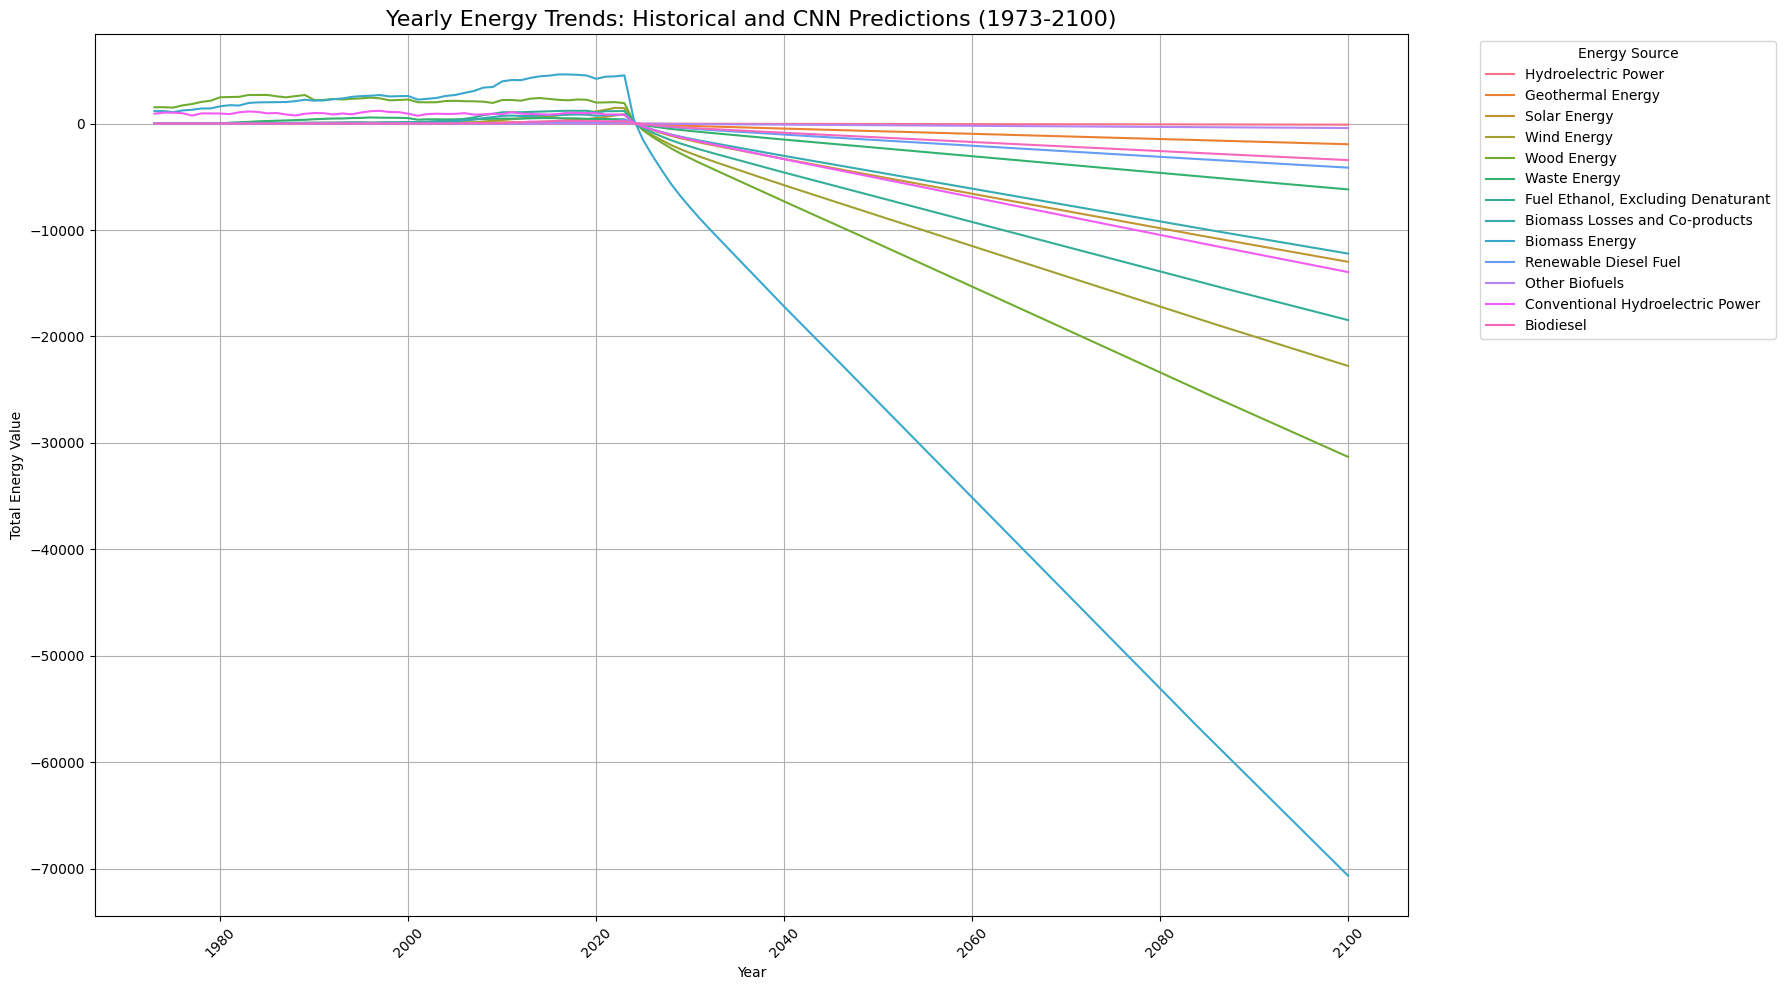

In [52]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=combined_cnn_df_melted, x='Year', y='Energy Value', hue='Energy Source')
plt.title('Yearly Energy Trends: Historical and CNN Predictions (1973-2100)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Energy Value')
plt.grid(True)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [55]:
df_filtered_years_up_to_2022 = dfe[(dfe['Year'] >= 1973) & (dfe['Year'] <= 2022)]

print("Filtered DataFrame head:")
print(df_filtered_years_up_to_2022.head())
print("\nFiltered DataFrame tail:")
print(df_filtered_years_up_to_2022.tail())

Filtered DataFrame head:
   Year  Month          Sector  Hydroelectric Power  Geothermal Energy  \
0  1973      1      Commerical                 0.00               0.00   
1  1973      1  Electric Power                 0.00               0.49   
2  1973      1      Industrial                 1.04               0.00   
3  1973      1     Residential                 0.00               0.00   
4  1973      1  Transportation                 0.00               0.00   

   Solar Energy  Wind Energy  Wood Energy  Waste Energy  \
0           0.0          0.0        0.570         0.000   
1           0.0          0.0        0.054         0.157   
2           0.0          0.0       98.933         0.000   
3           0.0          0.0       30.074         0.000   
4           0.0          0.0        0.000         0.000   

   Fuel Ethanol, Excluding Denaturant  Biomass Losses and Co-products  \
0                                 0.0                             0.0   
1                            

In [56]:
print("Identified yearly energy columns for summation:")
print(yearly_energy_columns)

Identified yearly energy columns for summation:
['Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy', 'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant', 'Biomass Losses and Co-products', 'Biomass Energy', 'Renewable Diesel Fuel', 'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel']


In [57]:
yearly_energy_sums_up_to_2022 = df_filtered_years_up_to_2022.groupby('Year')[yearly_energy_columns].sum().reset_index()

print("Yearly energy sums for 1973-2022 DataFrame head:")
print(yearly_energy_sums_up_to_2022.head())
print("\nYearly energy sums for 1973-2022 DataFrame tail:")
print(yearly_energy_sums_up_to_2022.tail())

Yearly energy sums for 1973-2022 DataFrame head:
   Year  Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0  1973               11.420              6.709           0.0          0.0   
1  1974               10.850              8.368           0.0          0.0   
2  1975               10.597             11.077           0.0          0.0   
3  1976               10.977             12.340           0.0          0.0   
4  1977               10.658             12.223           0.0          0.0   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0     1527.016         2.055                                 0.0   
1     1537.761         1.902                                 0.0   
2     1496.929         1.806                                 0.0   
3     1711.487         1.889                                 0.0   
4     1836.521         1.808                                 0.0   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel 

In [58]:
from sklearn.preprocessing import StandardScaler

# 1. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_up_to_2022['Year'].values.reshape(-1, 1)

# 2. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_up_to_2022[yearly_energy_columns].values

# 3. Create and fit StandardScaler for X, then transform X
x_scaler_cnn = StandardScaler()
X_scaled_cnn = x_scaler_cnn.fit_transform(X)

# 4. Create and fit StandardScaler for Y, then transform Y
y_scaler_cnn = StandardScaler()
Y_scaled_cnn = y_scaler_cnn.fit_transform(Y)

# 5. Reshape X_scaled_cnn for CNN input format (batch_size, channels, sequence_length)
# For a 1D CNN, channels=1 and sequence_length=1 since 'Year' is a single feature
X_scaled_cnn = X_scaled_cnn.reshape(X_scaled_cnn.shape[0], 1, 1)

print("Shape of X_scaled_cnn (for CNN input):", X_scaled_cnn.shape)
print("Shape of Y_scaled_cnn:", Y_scaled_cnn.shape)
print("First 5 rows of X_scaled_cnn:\n", X_scaled_cnn[:5])
print("First 5 rows of Y_scaled_cnn:\n", Y_scaled_cnn[:5])

Shape of X_scaled_cnn (for CNN input): (50, 1, 1)
Shape of Y_scaled_cnn: (50, 13)
First 5 rows of X_scaled_cnn:
 [[[-1.69774938]]

 [[-1.62845348]]

 [[-1.55915759]]

 [[-1.4898617 ]]

 [[-1.4205658 ]]]
First 5 rows of Y_scaled_cnn:
 [[ 0.25197106 -1.584255   -0.63555898 -0.59558624 -2.41748222 -1.87122647
  -0.85714091 -0.86730023 -1.428455   -0.41438875 -0.29044977 -0.20241391
  -0.59997912]
 [ 0.11986703 -1.54114667 -0.63555898 -0.59558624 -2.37915292 -1.87205375
  -0.85714091 -0.86730023 -1.43417398 -0.41438875 -0.29044977  0.8048545
  -0.59997912]
 [ 0.06123138 -1.47075457 -0.63555898 -0.59558624 -2.52480781 -1.87257283
  -0.85714091 -0.86730023 -1.52127349 -0.41438875 -0.29044977  0.77056945
  -0.59997912]
 [ 0.14930073 -1.43793611 -0.63555898 -0.59558624 -1.75944189 -1.87212404
  -0.85714091 -0.86730023 -1.37661534 -0.41438875 -0.29044977  0.20206188
  -0.59997912]
 [ 0.07536883 -1.4409763  -0.63555898 -0.59558624 -1.31342374 -1.87256202
  -0.85714091 -0.86730023 -1.31743771 -0.

In [60]:
class CNNPredictor(nn.Module):
    def __init__(self, input_channels, output_size):
        super(CNNPredictor, self).__init__()
        # Define convolutional layers
        self.conv1 = nn.Conv1d(input_channels, 32, kernel_size=1)
        self.bn1 = nn.BatchNorm1d(32)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout(0.3)
        self.conv2 = nn.Conv1d(32, 64, kernel_size=1)
        self.bn2 = nn.BatchNorm1d(64)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout(0.3)
        self.conv3 = nn.Conv1d(64, 128, kernel_size=1)
        self.bn3 = nn.BatchNorm1d(128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(0.3)
        # Define a fully connected layer to output the desired number of features
        self.fc = nn.Linear(128, output_size)

    def forward(self, x):
        # Pass through convolutional layers
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        # Flatten the output for the fully connected layer
        x = x.view(x.size(0), -1) # Flatten while preserving batch size
        # Pass through fully connected layer
        x = self.fc(x)
        return x

# Define model parameters
input_channels = X_scaled_cnn.shape[1] # Number of channels
output_size = Y_scaled_cnn.shape[1] # Number of target energy sources

# Instantiate the model
cnn_model = CNNPredictor(input_channels, output_size)

print(f"CNN Model Architecture:\n{cnn_model}")

CNN Model Architecture:
CNNPredictor(
  (conv1): Conv1d(1, 32, kernel_size=(1,), stride=(1,))
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (dropout1): Dropout(p=0.3, inplace=False)
  (conv2): Conv1d(32, 64, kernel_size=(1,), stride=(1,))
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (dropout2): Dropout(p=0.3, inplace=False)
  (conv3): Conv1d(64, 128, kernel_size=(1,), stride=(1,))
  (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (dropout3): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=128, out_features=13, bias=True)
)


In [61]:
import torch.optim as optim

# Convert numpy arrays to PyTorch tensors
X_train_cnn_tensor = torch.tensor(X_scaled_cnn, dtype=torch.float32)
Y_train_cnn_tensor = torch.tensor(Y_scaled_cnn, dtype=torch.float32)

# Create a TensorDataset and DataLoader
train_cnn_dataset = TensorDataset(X_train_cnn_tensor, Y_train_cnn_tensor)
train_cnn_loader = DataLoader(train_cnn_dataset, batch_size=8, shuffle=True) # Using a small batch size for a small dataset

# Define loss function and optimizer
criterion_cnn = nn.MSELoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs_cnn = 1000 # Increased epochs for better training

print("Starting CNN model training...")
for epoch in range(num_epochs_cnn):
    for X_batch, Y_batch in train_cnn_loader:
        # Forward pass
        outputs = cnn_model(X_batch)
        loss = criterion_cnn(outputs, Y_batch)

        # Backward and optimize
        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_cnn}], Loss: {loss.item():.4f}')

print("CNN Model training complete.")

Starting CNN model training...
Epoch [100/1000], Loss: 0.8770
Epoch [200/1000], Loss: 0.7078
Epoch [300/1000], Loss: 0.5313
Epoch [400/1000], Loss: 0.4571
Epoch [500/1000], Loss: 0.8323
Epoch [600/1000], Loss: 0.6427
Epoch [700/1000], Loss: 0.5842
Epoch [800/1000], Loss: 1.0467
Epoch [900/1000], Loss: 0.9526
Epoch [1000/1000], Loss: 0.2561
CNN Model training complete.


In [63]:
import numpy as np
import pandas as pd

# Generate future years from 2025 to 2100
future_years_cnn = np.arange(2025, 2101).reshape(-1, 1)

# Scale future years using the same x_scaler_cnn fitted on historical data
future_years_scaled_cnn = x_scaler_cnn.transform(future_years_cnn)

# Reshape future scaled years for CNN input format
future_years_cnn_tensor = torch.tensor(future_years_scaled_cnn.reshape(future_years_scaled_cnn.shape[0], 1, 1), dtype=torch.float32)

# Make predictions with the trained CNN model
cnn_model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for predictions
    predicted_scaled_values_cnn = cnn_model(future_years_cnn_tensor).numpy()

# Inverse transform the scaled predictions to get actual energy values
predicted_actual_values_cnn = y_scaler_cnn.inverse_transform(predicted_scaled_values_cnn)

# Create a DataFrame for the predicted future values
future_predictions_cnn_df = pd.DataFrame(predicted_actual_values_cnn, columns=yearly_energy_columns)
future_predictions_cnn_df['Year'] = future_years_cnn.flatten()

# Combine historical and predicted data
combined_cnn_df = pd.concat([yearly_energy_sums_up_to_2022, future_predictions_cnn_df], ignore_index=True)

print("Future CNN Predictions DataFrame head:")
print(future_predictions_cnn_df.head())
print("\nCombined CNN DataFrame head:")
print(combined_cnn_df.head())
print("\nCombined CNN DataFrame tail:")
print(combined_cnn_df.tail())

Future CNN Predictions DataFrame head:
   Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0             4.447980         120.427704    413.939331   978.230896   
1             4.193794         122.344315    438.253876  1026.170898   
2             3.944620         124.223190    462.255432  1073.427368   
3             3.695445         126.102036    486.256958  1120.683960   
4             3.446273         127.980888    510.258575  1167.940552   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0  2175.446533    472.284271                         1166.047241   
1  2170.945312    476.365051                         1194.294067   
2  2166.301025    480.361053                         1221.972290   
3  2161.656738    484.357086                         1249.650146   
4  2157.012451    488.353119                         1277.328125   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0                      807.621521     4483.

In [65]:
combined_cnn_df_melted = combined_cnn_df.melt(id_vars=['Year'], var_name='Energy Source', value_name='Energy Value')

print("Combined (Historical + CNN Predicted) Melted DataFrame head:")
print(combined_cnn_df_melted.head())
print("\nCombined (Historical + CNN Predicted) Melted DataFrame tail:")
print(combined_cnn_df_melted.tail())

Combined (Historical + CNN Predicted) Melted DataFrame head:
   Year        Energy Source  Energy Value
0  1973  Hydroelectric Power        11.420
1  1974  Hydroelectric Power        10.850
2  1975  Hydroelectric Power        10.597
3  1976  Hydroelectric Power        10.977
4  1977  Hydroelectric Power        10.658

Combined (Historical + CNN Predicted) Melted DataFrame tail:
      Year Energy Source  Energy Value
1633  2096     Biodiesel    840.662048
1634  2097     Biodiesel    849.431274
1635  2098     Biodiesel    858.200745
1636  2099     Biodiesel    866.970093
1637  2100     Biodiesel    875.739441


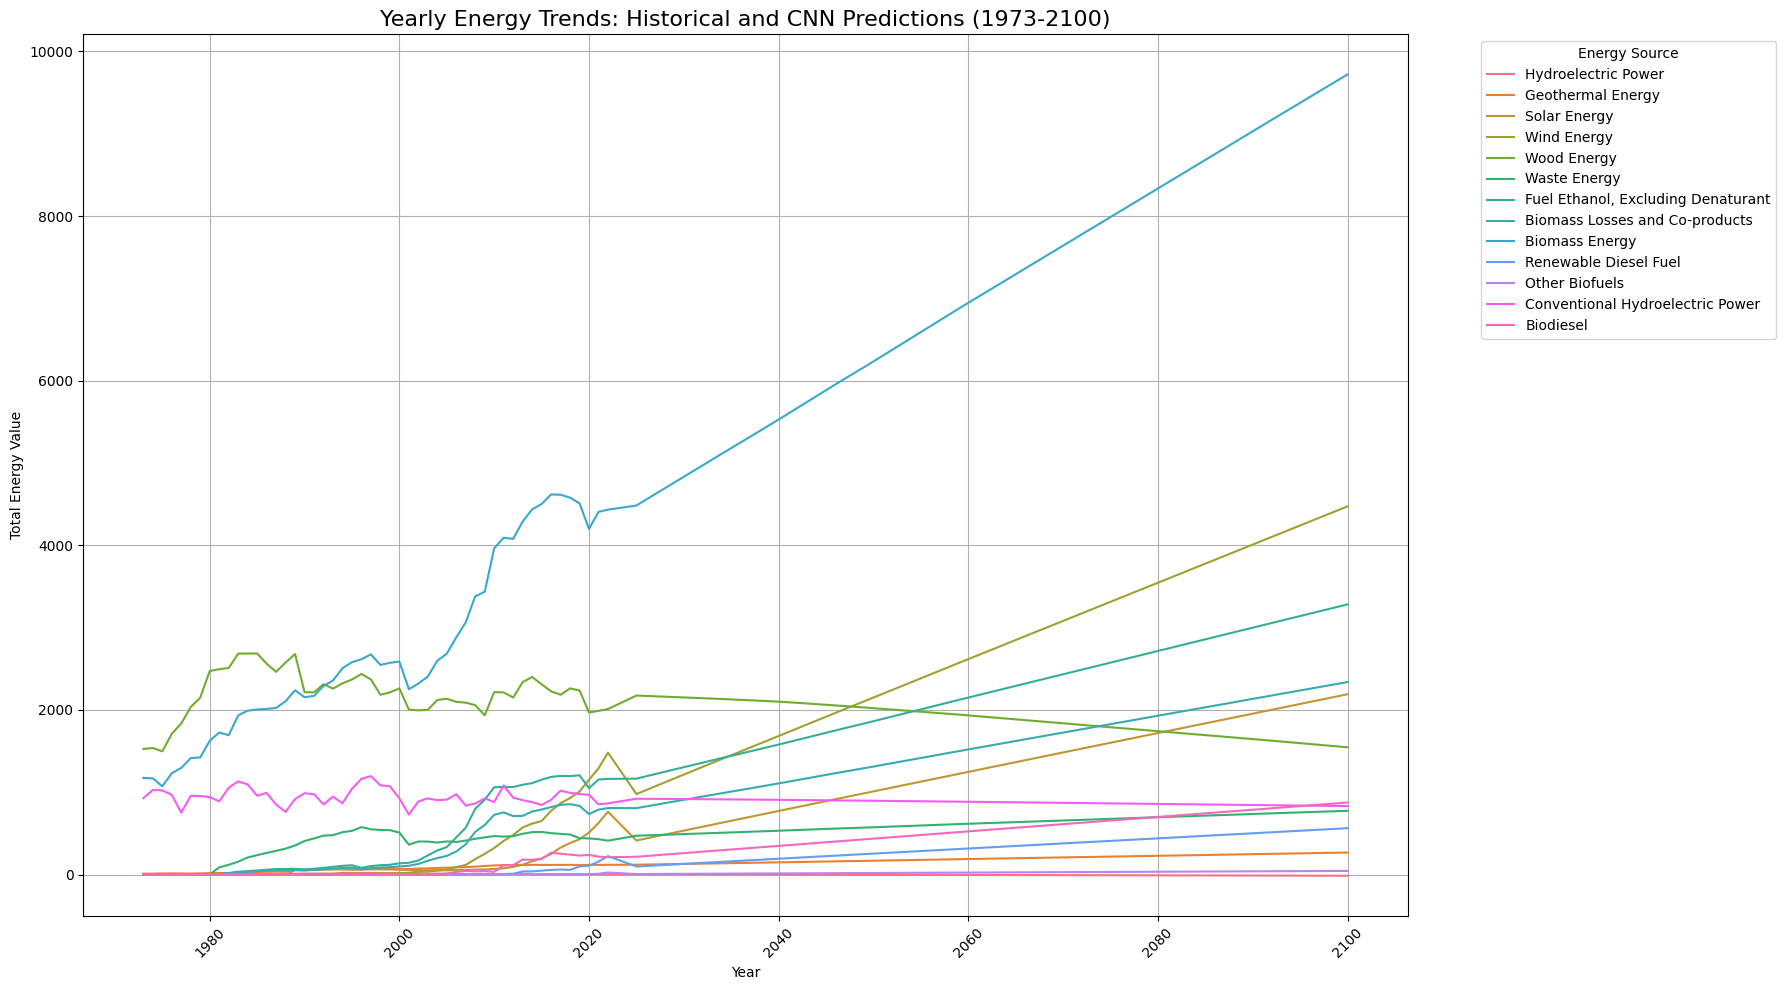

In [66]:
plt.figure(figsize=(18, 10))
sns.lineplot(data=combined_cnn_df_melted, x='Year', y='Energy Value', hue='Energy Source')
plt.title('Yearly Energy Trends: Historical and CNN Predictions (1973-2100)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Energy Value')
plt.grid(True)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [67]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train_cnn, X_test_cnn, Y_train_cnn, Y_test_cnn = train_test_split(
    X_scaled_cnn, Y_scaled_cnn, test_size=0.2, random_state=42
)

print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")
print(f"Y_train_cnn shape: {Y_train_cnn.shape}")
print(f"Y_test_cnn shape: {Y_test_cnn.shape}")

X_train_cnn shape: (40, 1, 1)
X_test_cnn shape: (10, 1, 1)
Y_train_cnn shape: (40, 13)
Y_test_cnn shape: (10, 13)


In [68]:
# Convert X_test_cnn to PyTorch tensor
X_test_cnn_tensor = torch.tensor(X_test_cnn, dtype=torch.float32)
# Convert Y_test_cnn to PyTorch tensor
Y_test_cnn_tensor = torch.tensor(Y_test_cnn, dtype=torch.float32)

cnn_model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for predictions
    outputs_test = cnn_model(X_test_cnn_tensor)
    test_loss = criterion_cnn(outputs_test, Y_test_cnn_tensor)

print(f"CNN Model Test Loss (MSE): {test_loss.item():.4f}")

CNN Model Test Loss (MSE): 0.2179


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Re-creating yearly_energy_sums_up_to_2022 to ensure consistency
yearly_energy_sums_up_to_2022 = df_filtered_years_up_to_2022.groupby('Year')[yearly_energy_columns].sum().reset_index()

# 1. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_up_to_2022['Year'].values.reshape(-1, 1)

# 2. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_up_to_2022[yearly_energy_columns].values

# 3. Create and fit StandardScaler for X, then transform X
x_scaler_cnn = StandardScaler()
X_scaled_cnn = x_scaler_cnn.fit_transform(X)

# 4. Create and fit StandardScaler for Y, then transform Y
y_scaler_cnn = StandardScaler()
Y_scaled_cnn = y_scaler_cnn.fit_transform(Y)

# 5. Reshape X_scaled_cnn for CNN input format (batch_size, channels, sequence_length)
# For a 1D CNN, channels=1 and sequence_length=1 since 'Year' is a single feature
X_scaled_cnn = X_scaled_cnn.reshape(X_scaled_cnn.shape[0], 1, 1)

# Split the data into training and testing sets
X_train_cnn, X_test_cnn, Y_train_cnn, Y_test_cnn = train_test_split(
    X_scaled_cnn, Y_scaled_cnn, test_size=0.2, random_state=42
)

print(f"X_train_cnn shape: {X_train_cnn.shape}")
print(f"X_test_cnn shape: {X_test_cnn.shape}")
print(f"Y_train_cnn shape: {Y_train_cnn.shape}")
print(f"Y_test_cnn shape: {Y_test_cnn.shape}")

X_train_cnn shape: (40, 1, 1)
X_test_cnn shape: (10, 1, 1)
Y_train_cnn shape: (40, 13)
Y_test_cnn shape: (10, 13)


In [72]:
import torch.optim as optim

# Convert numpy arrays to PyTorch tensors
X_train_cnn_tensor = torch.tensor(X_train_cnn, dtype=torch.float32)
Y_train_cnn_tensor = torch.tensor(Y_train_cnn, dtype=torch.float32)

# Create a TensorDataset and DataLoader
train_cnn_dataset = TensorDataset(X_train_cnn_tensor, Y_train_cnn_tensor)
train_cnn_loader = DataLoader(train_cnn_dataset, batch_size=8, shuffle=True)

# Re-instantiate the model to ensure a fresh start for retraining
input_channels_retrain = X_train_cnn.shape[1] # Number of channels (1 for 'Year')
output_size_retrain = Y_train_cnn.shape[1] # Number of target energy sources
cnn_model = CNNPredictor(input_channels_retrain, output_size_retrain)

# Define loss function and optimizer
criterion_cnn = nn.MSELoss()
optimizer_cnn = optim.Adam(cnn_model.parameters(), lr=0.001)

# Training loop
num_epochs_cnn = 1000 # Increased epochs for better training

print("Starting CNN model retraining...")
for epoch in range(num_epochs_cnn):
    for X_batch, Y_batch in train_cnn_loader:
        # Forward pass
        outputs = cnn_model(X_batch)
        loss = criterion_cnn(outputs, Y_batch)

        # Backward and optimize
        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_cnn}], Loss: {loss.item():.4f}')

print("CNN Model retraining complete.")

Starting CNN model retraining...
Epoch [100/1000], Loss: 0.3557
Epoch [200/1000], Loss: 0.6775
Epoch [300/1000], Loss: 0.3165
Epoch [400/1000], Loss: 0.2677
Epoch [500/1000], Loss: 0.3305
Epoch [600/1000], Loss: 0.7758
Epoch [700/1000], Loss: 0.5587
Epoch [800/1000], Loss: 0.6588
Epoch [900/1000], Loss: 0.6259
Epoch [1000/1000], Loss: 0.7866
CNN Model retraining complete.


In [73]:
import numpy as np
import pandas as pd

# Convert X_test_cnn to PyTorch tensor
X_test_cnn_tensor = torch.tensor(X_test_cnn, dtype=torch.float32)

# Make predictions with the retrained CNN model
cnn_model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for predictions
    predicted_scaled_values_test = cnn_model(X_test_cnn_tensor).numpy()

# Inverse transform the scaled predictions to get actual energy values
predicted_actual_values_test = y_scaler_cnn.inverse_transform(predicted_scaled_values_test)

# Inverse transform the scaled actual test values
actual_actual_values_test = y_scaler_cnn.inverse_transform(Y_test_cnn)

# Create DataFrames for better inspection (optional but good for debugging)
predicted_test_df = pd.DataFrame(predicted_actual_values_test, columns=yearly_energy_columns)
actual_test_df = pd.DataFrame(actual_actual_values_test, columns=yearly_energy_columns)

print("Predicted values on test set (first 5 rows):\n", predicted_test_df.head())
print("\nActual values on test set (first 5 rows):\n", actual_test_df.head())

Predicted values on test set (first 5 rows):
    Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0            11.454144          40.823681     22.859386    20.677248   
1             7.773687         100.344452    101.231110   336.408173   
2            11.906117          74.714546     62.031651   103.415115   
3             6.173977         109.978020    246.484619   664.270447   
4            12.253240          51.910671     39.975819    35.158649   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0  2442.600342    268.946014                           94.507141   
1  2183.173340    453.742126                          816.892334   
2  2239.779785    436.153320                          346.251617   
3  2209.336670    462.369873                         1029.131226   
4  2391.492432    346.480835                          136.646973   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0                       70.358459   

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize dictionaries to store metrics for each energy source
mae_scores = {}
mse_scores = {}
r2_scores = {}

# Calculate metrics for each energy source
for i, col_name in enumerate(yearly_energy_columns):
    mae = mean_absolute_error(actual_actual_values_test[:, i], predicted_actual_values_test[:, i])
    mse = mean_squared_error(actual_actual_values_test[:, i], predicted_actual_values_test[:, i])
    r2 = r2_score(actual_actual_values_test[:, i], predicted_actual_values_test[:, i])

    mae_scores[col_name] = mae
    mse_scores[col_name] = mse
    r2_scores[col_name] = r2

# Create DataFrames for better visualization of results
metrics_df = pd.DataFrame({
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R-squared': r2_scores
})

print("Regression Metrics for Each Energy Source:")
print(metrics_df)


Regression Metrics for Each Energy Source:
                                           MAE           MSE  R-squared
Hydroelectric Power                   2.052758      6.323520   0.684084
Geothermal Energy                     5.361307     53.534045   0.922918
Solar Energy                         51.189693  10963.822767   0.694185
Wind Energy                         121.603712  32837.370848   0.832267
Wood Energy                         107.070165  16753.916371   0.297200
Waste Energy                         49.908136   3496.001538   0.415999
Fuel Ethanol, Excluding Denaturant  113.597394  16807.348030   0.921912
Biomass Losses and Co-products       77.192815   8129.547161   0.919554
Biomass Energy                      207.614344  73514.657224   0.915118
Renewable Diesel Fuel                 9.830790    634.784058   0.727605
Other Biofuels                        0.586878      2.172204   0.769960
Conventional Hydroelectric Power     62.534688   5691.381354   0.021594
Biodiesel            

In [75]:
from sklearn.preprocessing import StandardScaler

# 1. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_up_to_2022['Year'].values.reshape(-1, 1)

# 2. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_up_to_2022[yearly_energy_columns].values

# 3. Create and fit StandardScaler for X, then transform X
x_scaler_rnn = StandardScaler()
X_scaled_rnn = x_scaler_rnn.fit_transform(X)

# 4. Create and fit StandardScaler for Y, then transform Y
y_scaler_rnn = StandardScaler()
Y_scaled_rnn = y_scaler_rnn.fit_transform(Y)

# 5. Reshape X_scaled_rnn for RNN input format (batch_size, sequence_length, input_size)
# For a simple RNN, sequence_length=1 since 'Year' is a single time step feature here
X_scaled_rnn = X_scaled_rnn.reshape(X_scaled_rnn.shape[0], 1, 1)

print("Shape of X_scaled_rnn (for RNN input):", X_scaled_rnn.shape)
print("Shape of Y_scaled_rnn:", Y_scaled_rnn.shape)
print("First 5 rows of X_scaled_rnn:\n", X_scaled_rnn[:5])
print("First 5 rows of Y_scaled_rnn:\n", Y_scaled_rnn[:5])

Shape of X_scaled_rnn (for RNN input): (50, 1, 1)
Shape of Y_scaled_rnn: (50, 13)
First 5 rows of X_scaled_rnn:
 [[[-1.69774938]]

 [[-1.62845348]]

 [[-1.55915759]]

 [[-1.4898617 ]]

 [[-1.4205658 ]]]
First 5 rows of Y_scaled_rnn:
 [[ 0.25197106 -1.584255   -0.63555898 -0.59558624 -2.41748222 -1.87122647
  -0.85714091 -0.86730023 -1.428455   -0.41438875 -0.29044977 -0.20241391
  -0.59997912]
 [ 0.11986703 -1.54114667 -0.63555898 -0.59558624 -2.37915292 -1.87205375
  -0.85714091 -0.86730023 -1.43417398 -0.41438875 -0.29044977  0.8048545
  -0.59997912]
 [ 0.06123138 -1.47075457 -0.63555898 -0.59558624 -2.52480781 -1.87257283
  -0.85714091 -0.86730023 -1.52127349 -0.41438875 -0.29044977  0.77056945
  -0.59997912]
 [ 0.14930073 -1.43793611 -0.63555898 -0.59558624 -1.75944189 -1.87212404
  -0.85714091 -0.86730023 -1.37661534 -0.41438875 -0.29044977  0.20206188
  -0.59997912]
 [ 0.07536883 -1.4409763  -0.63555898 -0.59558624 -1.31342374 -1.87256202
  -0.85714091 -0.86730023 -1.31743771 -0.

In [76]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Re-define the columns of interest
yearly_energy_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy',
    'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant',
    'Biomass Losses and Co-products', 'Biomass Energy', 'Renewable Diesel Fuel',
    'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel'
]

# Re-create the filtered and grouped dataframe from dfe
df_filtered_years_up_to_2022 = dfe[(dfe['Year'] >= 1973) & (dfe['Year'] <= 2022)]
yearly_energy_sums_up_to_2022 = df_filtered_years_up_to_2022.groupby('Year')[yearly_energy_columns].sum().reset_index()

# 1. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_up_to_2022['Year'].values.reshape(-1, 1)

# 2. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_up_to_2022[yearly_energy_columns].values

# 3. Create and fit StandardScaler for X, then transform X
x_scaler_rnn = StandardScaler()
X_scaled_rnn = x_scaler_rnn.fit_transform(X)

# 4. Create and fit StandardScaler for Y, then transform Y
y_scaler_rnn = StandardScaler()
Y_scaled_rnn = y_scaler_rnn.fit_transform(Y)

# 5. Reshape X_scaled_rnn for RNN input format (batch_size, sequence_length, input_size)
# For a simple RNN, sequence_length=1 since 'Year' is a single time step feature here
X_scaled_rnn = X_scaled_rnn.reshape(X_scaled_rnn.shape[0], 1, 1)

print("Shape of X_scaled_rnn (for RNN input):", X_scaled_rnn.shape)
print("Shape of Y_scaled_rnn:", Y_scaled_rnn.shape)
print("First 5 rows of X_scaled_rnn:\n", X_scaled_rnn[:5])
print("First 5 rows of Y_scaled_rnn:\n", Y_scaled_rnn[:5])

Shape of X_scaled_rnn (for RNN input): (50, 1, 1)
Shape of Y_scaled_rnn: (50, 13)
First 5 rows of X_scaled_rnn:
 [[[-1.69774938]]

 [[-1.62845348]]

 [[-1.55915759]]

 [[-1.4898617 ]]

 [[-1.4205658 ]]]
First 5 rows of Y_scaled_rnn:
 [[ 0.25197106 -1.584255   -0.63555898 -0.59558624 -2.41748222 -1.87122647
  -0.85714091 -0.86730023 -1.428455   -0.41438875 -0.29044977 -0.20241391
  -0.59997912]
 [ 0.11986703 -1.54114667 -0.63555898 -0.59558624 -2.37915292 -1.87205375
  -0.85714091 -0.86730023 -1.43417398 -0.41438875 -0.29044977  0.8048545
  -0.59997912]
 [ 0.06123138 -1.47075457 -0.63555898 -0.59558624 -2.52480781 -1.87257283
  -0.85714091 -0.86730023 -1.52127349 -0.41438875 -0.29044977  0.77056945
  -0.59997912]
 [ 0.14930073 -1.43793611 -0.63555898 -0.59558624 -1.75944189 -1.87212404
  -0.85714091 -0.86730023 -1.37661534 -0.41438875 -0.29044977  0.20206188
  -0.59997912]
 [ 0.07536883 -1.4409763  -0.63555898 -0.59558624 -1.31342374 -1.87256202
  -0.85714091 -0.86730023 -1.31743771 -0.

In [77]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Reload the dataset
energy_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/dataset.csv'
dfe = pd.read_csv(energy_url)

# 2. Define columns of interest
yearly_energy_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy',
    'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant',
    'Biomass Losses and Co-products', 'Biomass Energy', 'Renewable Diesel Fuel',
    'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel'
]

# 3. Filter and group the data
df_filtered_years_up_to_2022 = dfe[(dfe['Year'] >= 1973) & (dfe['Year'] <= 2022)]
yearly_energy_sums_up_to_2022 = df_filtered_years_up_to_2022.groupby('Year')[yearly_energy_columns].sum().reset_index()

# 4. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_up_to_2022['Year'].values.reshape(-1, 1)

# 5. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_up_to_2022[yearly_energy_columns].values

# 6. Create and fit StandardScaler for X, then transform X
x_scaler_rnn = StandardScaler()
X_scaled_rnn = x_scaler_rnn.fit_transform(X)

# 7. Create and fit StandardScaler for Y, then transform Y
y_scaler_rnn = StandardScaler()
Y_scaled_rnn = y_scaler_rnn.fit_transform(Y)

# 8. Reshape X_scaled_rnn for RNN input format (batch_size, sequence_length, input_size)
# For a simple RNN, sequence_length=1 since 'Year' is a single time step feature here
X_scaled_rnn = X_scaled_rnn.reshape(X_scaled_rnn.shape[0], 1, 1)

print("Shape of X_scaled_rnn (for RNN input):", X_scaled_rnn.shape)
print("Shape of Y_scaled_rnn:", Y_scaled_rnn.shape)
print("First 5 rows of X_scaled_rnn:\n", X_scaled_rnn[:5])
print("First 5 rows of Y_scaled_rnn:\n", Y_scaled_rnn[:5])

Shape of X_scaled_rnn (for RNN input): (50, 1, 1)
Shape of Y_scaled_rnn: (50, 13)
First 5 rows of X_scaled_rnn:
 [[[-1.69774938]]

 [[-1.62845348]]

 [[-1.55915759]]

 [[-1.4898617 ]]

 [[-1.4205658 ]]]
First 5 rows of Y_scaled_rnn:
 [[ 0.25197106 -1.584255   -0.63555898 -0.59558624 -2.41748222 -1.87122647
  -0.85714091 -0.86730023 -1.428455   -0.41438875 -0.29044977 -0.20241391
  -0.59997912]
 [ 0.11986703 -1.54114667 -0.63555898 -0.59558624 -2.37915292 -1.87205375
  -0.85714091 -0.86730023 -1.43417398 -0.41438875 -0.29044977  0.8048545
  -0.59997912]
 [ 0.06123138 -1.47075457 -0.63555898 -0.59558624 -2.52480781 -1.87257283
  -0.85714091 -0.86730023 -1.52127349 -0.41438875 -0.29044977  0.77056945
  -0.59997912]
 [ 0.14930073 -1.43793611 -0.63555898 -0.59558624 -1.75944189 -1.87212404
  -0.85714091 -0.86730023 -1.37661534 -0.41438875 -0.29044977  0.20206188
  -0.59997912]
 [ 0.07536883 -1.4409763  -0.63555898 -0.59558624 -1.31342374 -1.87256202
  -0.85714091 -0.86730023 -1.31743771 -0.

In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# 1. Reload the dataset
energy_url = 'https://raw.githubusercontent.com/kcarroth-dev/KarltonCarrothers_ML/main/dataset.csv'
dfe = pd.read_csv(energy_url)

# 2. Define columns of interest
yearly_energy_columns = [
    'Hydroelectric Power', 'Geothermal Energy', 'Solar Energy', 'Wind Energy',
    'Wood Energy', 'Waste Energy', 'Fuel Ethanol, Excluding Denaturant',
    'Biomass Losses and Co-products', 'Biomass Energy', 'Renewable Diesel Fuel',
    'Other Biofuels', 'Conventional Hydroelectric Power', 'Biodiesel'
]

# 3. Filter and group the data
df_filtered_years_up_to_2022 = dfe[(dfe['Year'] >= 1973) & (dfe['Year'] <= 2022)]
yearly_energy_sums_up_to_2022 = df_filtered_years_up_to_2022.groupby('Year')[yearly_energy_columns].sum().reset_index()

# 4. Extract 'Year' column as X and reshape to 2D array
X = yearly_energy_sums_up_to_2022['Year'].values.reshape(-1, 1)

# 5. Extract yearly_energy_columns as Y
Y = yearly_energy_sums_up_to_2022[yearly_energy_columns].values

# 6. Create and fit StandardScaler for X, then transform X
x_scaler_rnn = StandardScaler()
X_scaled_rnn = x_scaler_rnn.fit_transform(X)

# 7. Create and fit StandardScaler for Y, then transform Y
y_scaler_rnn = StandardScaler()
Y_scaled_rnn = y_scaler_rnn.fit_transform(Y)

# 8. Reshape X_scaled_rnn for RNN input format (batch_size, sequence_length, input_size)
# For a simple RNN, sequence_length=1 since 'Year' is a single time step feature here
X_scaled_rnn = X_scaled_rnn.reshape(X_scaled_rnn.shape[0], 1, 1)

print("Shape of X_scaled_rnn (for RNN input):", X_scaled_rnn.shape)
print("Shape of Y_scaled_rnn:", Y_scaled_rnn.shape)
print("First 5 rows of X_scaled_rnn:\n", X_scaled_rnn[:5])
print("First 5 rows of Y_scaled_rnn:\n", Y_scaled_rnn[:5])

Shape of X_scaled_rnn (for RNN input): (50, 1, 1)
Shape of Y_scaled_rnn: (50, 13)
First 5 rows of X_scaled_rnn:
 [[[-1.69774938]]

 [[-1.62845348]]

 [[-1.55915759]]

 [[-1.4898617 ]]

 [[-1.4205658 ]]]
First 5 rows of Y_scaled_rnn:
 [[ 0.25197106 -1.584255   -0.63555898 -0.59558624 -2.41748222 -1.87122647
  -0.85714091 -0.86730023 -1.428455   -0.41438875 -0.29044977 -0.20241391
  -0.59997912]
 [ 0.11986703 -1.54114667 -0.63555898 -0.59558624 -2.37915292 -1.87205375
  -0.85714091 -0.86730023 -1.43417398 -0.41438875 -0.29044977  0.8048545
  -0.59997912]
 [ 0.06123138 -1.47075457 -0.63555898 -0.59558624 -2.52480781 -1.87257283
  -0.85714091 -0.86730023 -1.52127349 -0.41438875 -0.29044977  0.77056945
  -0.59997912]
 [ 0.14930073 -1.43793611 -0.63555898 -0.59558624 -1.75944189 -1.87212404
  -0.85714091 -0.86730023 -1.37661534 -0.41438875 -0.29044977  0.20206188
  -0.59997912]
 [ 0.07536883 -1.4409763  -0.63555898 -0.59558624 -1.31342374 -1.87256202
  -0.85714091 -0.86730023 -1.31743771 -0.

In [95]:
import torch
import torch.nn as nn

class RNNPredictor(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(RNNPredictor, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        # Define RNN layer
        self.rnn = nn.RNN(input_size, hidden_size, num_layers, batch_first=True)
        # Define fully connected layer
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Initialize hidden state with zeros
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)

        # Forward propagate RNN
        # out: tensor of shape (batch_size, seq_length, hidden_size)
        out, _ = self.rnn(x, h0)

        # Decode the hidden state of the last time step
        out = self.fc(out[:, -1, :])
        return out

# Define model parameters based on data shapes
input_size = X_scaled_rnn.shape[2] # Number of features (1)
hidden_size = 128
num_layers = 1
output_size = Y_scaled_rnn.shape[1] # Number of target variables (13)

# Instantiate the model
rnn_model = RNNPredictor(input_size, hidden_size, num_layers, output_size)

print(f"RNN Model Architecture:\n{rnn_model}")

RNN Model Architecture:
RNNPredictor(
  (rnn): RNN(1, 128, batch_first=True)
  (fc): Linear(in_features=128, out_features=13, bias=True)
)


In [96]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Convert numpy arrays to PyTorch tensors
X_train_rnn_tensor = torch.tensor(X_scaled_rnn, dtype=torch.float32)
Y_train_rnn_tensor = torch.tensor(Y_scaled_rnn, dtype=torch.float32)

# Create a TensorDataset and DataLoader
train_rnn_dataset = TensorDataset(X_train_rnn_tensor, Y_train_rnn_tensor)
train_rnn_loader = DataLoader(train_rnn_dataset, batch_size=8, shuffle=True)

# Define loss function and optimizer
criterion_rnn = nn.MSELoss()
optimizer_rnn = optim.Adam(rnn_model.parameters(), lr=0.001)

# Training loop
num_epochs_rnn = 1000

print("Starting RNN model training...")
for epoch in range(num_epochs_rnn):
    for X_batch, Y_batch in train_rnn_loader:
        # Forward pass
        outputs = rnn_model(X_batch)
        loss = criterion_rnn(outputs, Y_batch)

        # Backward and optimize
        optimizer_rnn.zero_grad()
        loss.backward()
        optimizer_rnn.step()

    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs_rnn}], Loss: {loss.item():.4f}')

print("RNN Model training complete.")

Starting RNN model training...
Epoch [100/1000], Loss: 0.2497
Epoch [200/1000], Loss: 0.2168
Epoch [300/1000], Loss: 0.7187
Epoch [400/1000], Loss: 0.2336
Epoch [500/1000], Loss: 0.2151
Epoch [600/1000], Loss: 0.2516
Epoch [700/1000], Loss: 0.1204
Epoch [800/1000], Loss: 0.3281
Epoch [900/1000], Loss: 0.3358
Epoch [1000/1000], Loss: 0.1253
RNN Model training complete.


In [97]:
import numpy as np
import pandas as pd
import torch

# 1. Generate future years from 2025 to 2100
future_years_rnn = np.arange(2025, 2101).reshape(-1, 1)

# 2. Scale future years using the same x_scaler_rnn fitted on historical data
future_years_scaled_rnn = x_scaler_rnn.transform(future_years_rnn)

# 3. Reshape future scaled years for RNN input format (batch_size, sequence_length, input_size)
future_years_rnn_tensor = torch.tensor(future_years_scaled_rnn.reshape(future_years_scaled_rnn.shape[0], 1, 1), dtype=torch.float32)

# 4. Make predictions with the trained RNN model
rnn_model.eval() # Set the model to evaluation mode
with torch.no_grad(): # Disable gradient calculation for predictions
    predicted_scaled_values_rnn = rnn_model(future_years_rnn_tensor).numpy()

# 5. Inverse transform the scaled predictions to get actual energy values
predicted_actual_values_rnn = y_scaler_rnn.inverse_transform(predicted_scaled_values_rnn)

# 6. Create a DataFrame for the predicted future values
future_predictions_rnn_df = pd.DataFrame(predicted_actual_values_rnn, columns=yearly_energy_columns)
future_predictions_rnn_df['Year'] = future_years_rnn.flatten()

# 7. Combine historical and predicted data
combined_rnn_df = pd.concat([yearly_energy_sums_up_to_2022, future_predictions_rnn_df], ignore_index=True)

print("Future RNN Predictions DataFrame head:")
print(future_predictions_rnn_df.head())
print("\nCombined RNN DataFrame head:")
print(combined_rnn_df.head())
print("\nCombined RNN DataFrame tail:")
print(combined_rnn_df.tail())

Future RNN Predictions DataFrame head:
   Hydroelectric Power  Geothermal Energy  Solar Energy  Wind Energy  \
0             2.111416         127.707932    727.956360  1631.917603   
1             1.885579         129.317627    765.441467  1706.252075   
2             1.709638         130.998535    799.752991  1773.354858   
3             1.582262         132.747391    830.928101  1833.334595   
4             1.501024         134.558716    859.086853  1886.477905   

   Wood Energy  Waste Energy  Fuel Ethanol, Excluding Denaturant  \
0  2108.349609    472.766296                         1372.982788   
1  2112.405762    479.887543                         1395.665771   
2  2117.832031    488.637634                         1415.576782   
3  2124.591553    498.975342                         1432.785034   
4  2132.623047    510.821228                         1447.414795   

   Biomass Losses and Co-products  Biomass Energy  Renewable Diesel Fuel  \
0                      969.207458     5118.

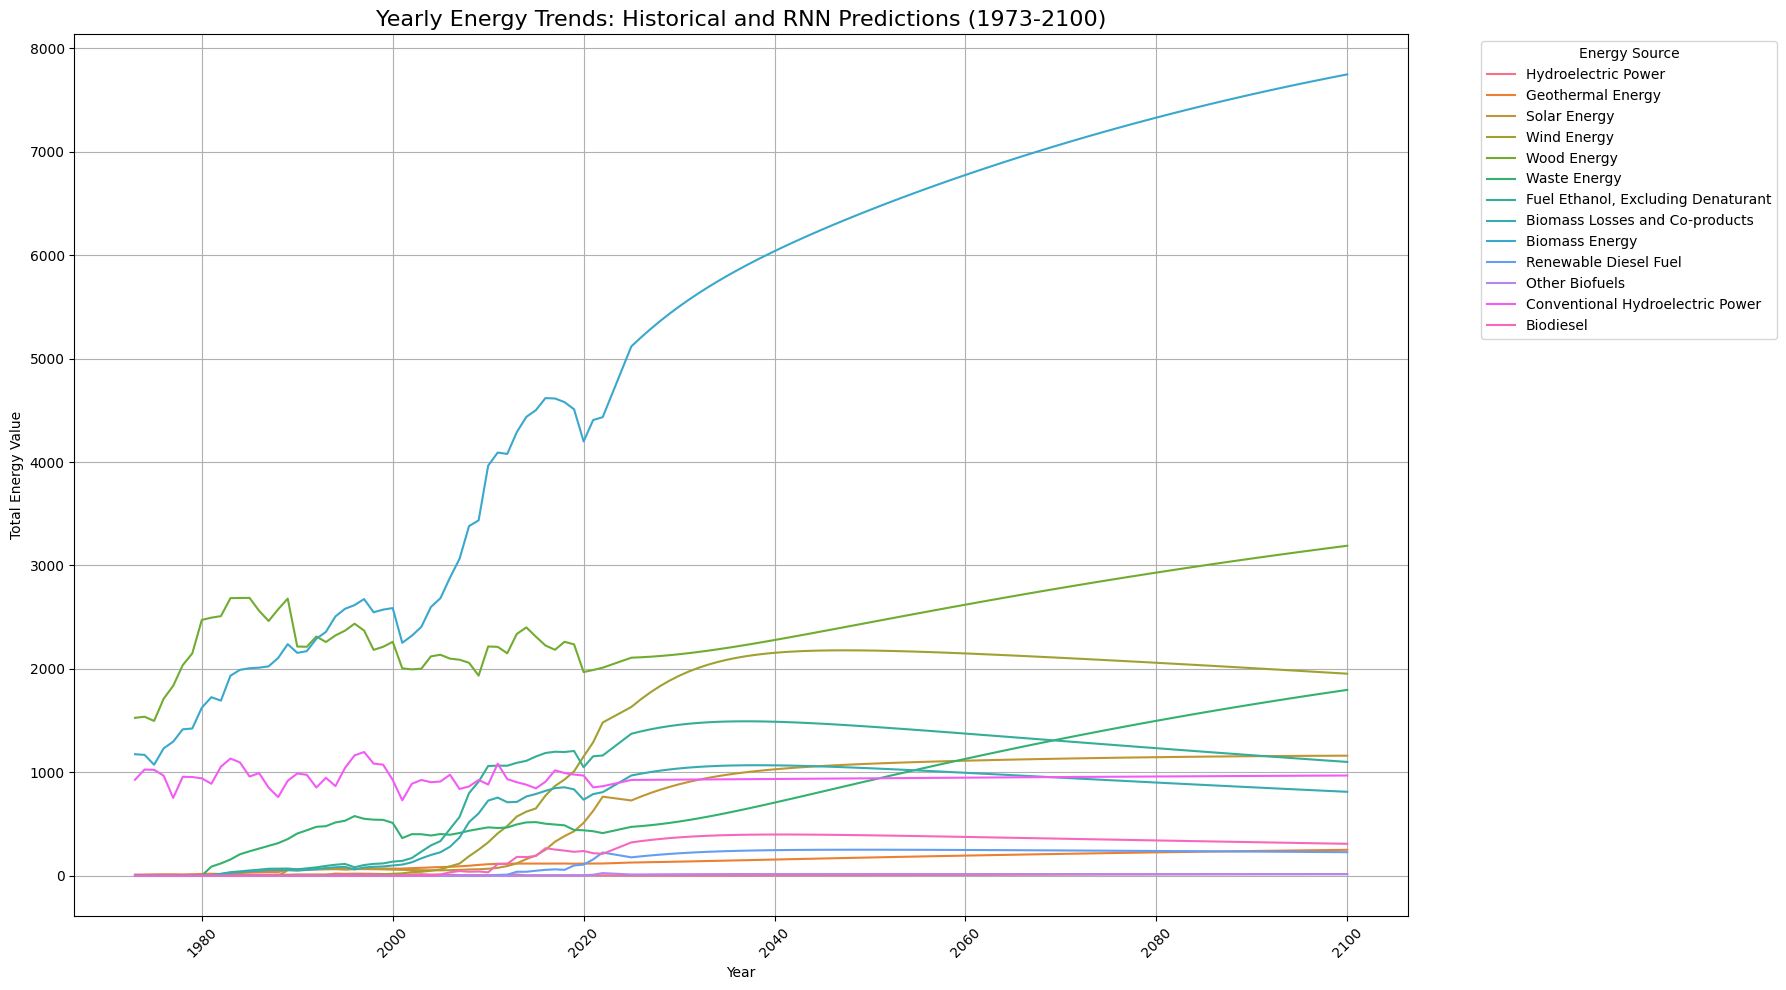

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

# Melt the combined DataFrame to long format for plotting
combined_rnn_df_melted = combined_rnn_df.melt(id_vars=['Year'], var_name='Energy Source', value_name='Energy Value')

# Plotting
plt.figure(figsize=(18, 10))
sns.lineplot(data=combined_rnn_df_melted, x='Year', y='Energy Value', hue='Energy Source')
plt.title('Yearly Energy Trends: Historical and RNN Predictions (1973-2100)', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Total Energy Value')
plt.grid(True)
plt.legend(title='Energy Source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [99]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# 1. Prepare historical data for prediction
# X_scaled_rnn is already shaped for RNN (batch, seq, feature)
X_historical_rnn_tensor = torch.tensor(X_scaled_rnn, dtype=torch.float32)

# 2. Make predictions using the trained RNN model
rnn_model.eval()
with torch.no_grad():
    predicted_scaled_historical_rnn = rnn_model(X_historical_rnn_tensor).numpy()

# 3. Inverse transform the predictions
predicted_historical_rnn = y_scaler_rnn.inverse_transform(predicted_scaled_historical_rnn)

# 4. Calculate metrics using the actual historical values (Y)
mae_scores_rnn = {}
mse_scores_rnn = {}
r2_scores_rnn = {}

for i, col_name in enumerate(yearly_energy_columns):
    mae = mean_absolute_error(Y[:, i], predicted_historical_rnn[:, i])
    mse = mean_squared_error(Y[:, i], predicted_historical_rnn[:, i])
    r2 = r2_score(Y[:, i], predicted_historical_rnn[:, i])

    mae_scores_rnn[col_name] = mae
    mse_scores_rnn[col_name] = mse
    r2_scores_rnn[col_name] = r2

# 5. Create DataFrame
metrics_df_rnn = pd.DataFrame({
    'MAE': mae_scores_rnn,
    'MSE': mse_scores_rnn,
    'R-squared': r2_scores_rnn
})

print("Regression Metrics for RNN Model (Historical Data):")
print(metrics_df_rnn)

Regression Metrics for RNN Model (Historical Data):
                                           MAE           MSE  R-squared
Hydroelectric Power                   2.028831      6.930638   0.627732
Geothermal Energy                     5.726690     47.882991   0.967670
Solar Energy                         25.229292   1314.635293   0.951753
Wind Energy                          19.836327    859.720970   0.994290
Wood Energy                         197.240323  59689.532008   0.240466
Waste Energy                         41.588018   2660.811081   0.922208
Fuel Ethanol, Excluding Denaturant   89.290017  11620.271082   0.947239
Biomass Losses and Co-products       61.619253   5644.098587   0.945296
Biomass Energy                      224.438593  76047.538597   0.936590
Renewable Diesel Fuel                 6.648783    199.996405   0.896033
Other Biofuels                        0.995054      6.126148   0.595063
Conventional Hydroelectric Power     73.026683   9149.333576   0.048512
Biodiesel   